In [48]:
import axelrod as axl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tqdm
import enum
%matplotlib inline


In [54]:
## testing

# axl.seed(0)  # Set a seed
# players = [s() for s in axl.demo_strategies]  # Create players
# tournament = axl.Tournament(players)  # Create a tournament
# results = tournament.play()  # Play the tournament
# results.ranked_names

In [55]:
# results

In [56]:
# plot = axl.Plot(results)
# plot.boxplot()

In [2]:
# represent all avaliable strategies, plus a few parametized ones
parameterized_players = [
        axl.Random(0.1),
        axl.Random(0.3),
        axl.Random(0.7),
        axl.Random(0.9),
        axl.GTFT(0.1),
        axl.GTFT(0.3),
        axl.GTFT(0.7),
        axl.GTFT(0.9),
        axl.MetaWinner(team=[
        axl.EvolvedHMM5, axl.EvolvedLookerUp2_2_2, axl.EvolvedFSM16,
        axl.EvolvedANN5, axl.PSOGambler2_2_2, axl.FoolMeOnce,
        axl.DoubleCrosser, axl.Gradual
    ]),
]

players = [s() for s in axl.strategies] + parameterized_players

In [3]:
len(players)

230

In [4]:
"""
A script with utility functions to get the tournament results
modified from https://github.com/Axelrod-Python/tournament
"""
from collections import namedtuple
from numpy import median


def label(prefix, results, turns):
    """
    A label used for the various plots
    """
    return "{} - turns: {}, repetitions: {}, strategies: {}. ".format(prefix,
                turns, results.repetitions, results.num_players)

def obtain_assets(results, filename, turns, strategies_name="strategies",
                  tournament_type="std",
                  assets_dir="./assets", lengthplot=False):
    """
    From the results of a tournament: obtain the various plots and the summary
    data set
    Parameters
    ----------
        results: axelrod.resultset instance
        strategies_name: string, eg: "ordinary_strategies"
        tournament_type: string, eg: "std"
        assets_dir: string [default: "./assets"]
        lengthplot: boolean [default: False], whether or not to plot the length
        of the matches (only needed for the probabilistic ending matches)
    """

    if not os.path.exists(assets_dir):
        os.makedirs(assets_dir)
    
    total = 6 + int(lengthplot)

    pbar = tqdm.tqdm(total=total, desc="Obtaining plots")

    file_path_root = "{}/{}_{}".format(assets_dir, strategies_name,
                                       tournament_type)
    plot = axl.Plot(results)

    f = plot.boxplot(title=label("Payoff", results, turns))
    f.savefig("{}_boxplot.png".format(file_path_root))
    f.savefig("{}_boxplot.svg".format(file_path_root))
    pbar.update()

    f = plot.payoff(title=label("Payoff", results, turns))
    f.savefig("{}_payoff.png".format(file_path_root))
    f.savefig("{}_payoff.svg".format(file_path_root))
    pbar.update()

    f = plot.winplot(title=label("Wins", results, turns))
    f.savefig("{}_winplot.png".format(file_path_root))
    f.savefig("{}_winplot.svg".format(file_path_root))
    pbar.update()

    f = plot.sdvplot(title=label("Payoff differences", results, turns))
    f.savefig("{}_sdvplot.png".format(file_path_root))
    f.savefig("{}_sdvplot.svg".format(file_path_root))
    pbar.update()

    f = plot.pdplot(title=label("Payoff differences", results, turns))
    f.savefig("{}_pdplot.png".format(file_path_root))
    f.savefig("{}_pdplot.svg".format(file_path_root))
    pbar.update()

    eco = axl.Ecosystem(results)
    eco.reproduce(1000)
    f = plot.stackplot(eco, title=label("Eco", results, turns))
    f.savefig("{}_reproduce.png".format(file_path_root))
    f.savefig("{}_reproduce.svg".format(file_path_root))
    pbar.update()

    if lengthplot is True:
        f = plot.lengthplot(title=label("Length of matches", results, turns))
        f.savefig("{}_lengthplot.png".format(file_path_root))
        f.savefig("{}_lengthplot.svg".format(file_path_root))
        pbar.update()
        
    return plot

In [5]:
def run_tournament(players, turns, repetitions, filename, tournament_type="std", assets_dir="./assets", match_attributes=None):
    axl.seed(seed)  # Setting a seed

    tournament = axl.Tournament(players, turns=turns, repetitions=repetitions, match_attributes=None)

    results = tournament.play(filename=filename, processes=processes)
    obtain_assets(results, filename, turns, "strategies", tournament_type, assets_dir)
    results.write_summary(assets_dir + '/' + tournament_type + '_summary.csv')
    return results

In [6]:
# run a sample tournament

turns = 10
repetitions = 1

processes = 0
seed = 1
filename = "data/strategies_std_interactions.csv"



In [58]:
x_train = []
y_train = []

players = np.array(players)
players_list = [str(p) for p in players]

for i in range(20):

    _x = np.random.choice([0, 1], size=(len(players),), p=[9./10, 1./10])
    t_players = players[np.nonzero(_x)]

    tournament = axl.Tournament(t_players, turns=turns, repetitions=repetitions, match_attributes=None)

    res = tournament.play(filename=None, processes=processes).summarise()

    __y = [players_list.index(p.Name) for p in res[:5]]
    # convert to onehot
    _y = np.zeros(len(players))
    _y[__y] = 1
    
    x_train.append(_x)
    y_train.append(_y)
    
x_train, y_train

Analysing: 100%|██████████| 25/25 [00:00<00:00, 142.57it/s]


([array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
  array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

ValueError: 109 is not in list

In [57]:
_y = [5, 3, 138]

__y = np.zeros(230)
__y[_y] = 1

__y

array([ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [11]:
help(players[0])

Help on Adaptive in module axelrod.strategies.adaptive object:

class Adaptive(axelrod.player.Player)
 |  Start with a specific sequence of C and D, then play the strategy that
 |  has worked best, recalculated each turn.
 |  
 |  Names:
 |  
 |  - Adaptive: [Li2011]_
 |  
 |  Method resolution order:
 |      Adaptive
 |      axelrod.player.Player
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, initial_plays:List[axelrod.action.Action]=None) -> None
 |      Initiates an empty history and 0 score for a player.
 |  
 |  score_last_round(self, opponent:axelrod.player.Player)
 |  
 |  strategy(self, opponent:axelrod.player.Player) -> axelrod.action.Action
 |      This is a placeholder strategy.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  classifier = {'inspects_source': False, 'long_run_time': False, 'makes...
 |  
 |  name = 'Adaptive'
 |  
 |  --------------------------

In [12]:
res[0].Name, players[0].name

('RichardHufford', 'Adaptive')

In [40]:
res[2].Name, str(players[138])

('Retaliate 2: 0.08', 'Retaliate 2: 0.08')

In [46]:
""" fuck axelrod

turns out that in result summary, res[i].Name is not the same as players[i].name

BUT it is the same as str(players[i])

??????????????????????????????........................."""

for i in res:
    print(i.Name in [str(p) for p in players])
    
print("")
for i in res:
    print(i.Name in [p.name for p in players])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

True
True
False
True
False
False
True
True
True
True
True
True
True
False
True
False
True
False
False
False
True
False
True


In [24]:
rank_dict = {}

In [52]:
res[0].Name in [p.name for p in players]

False

In [41]:
for i in range(50):
    t_players = random.sample(players, 30)
    tournament = axl.Tournament(t_players, turns=turns, repetitions=repetitions, match_attributes=None)

    res = tournament.play(filename=None, processes=processes).summarise()
    
    for a, b in [(p.Name, p.Rank) for p in res]:
        if a not in rank_dict:
            rank_dict[a] = []
        rank_dict[a].append(b)



rank_dict


Playing matches: 100%|██████████| 465/465 [00:01<00:00, 329.62it/s]

Playing matches:   4%|▎         | 933/26565 [06:31<2:59:12,  2.38it/s]

Analysing: 100%|██████████| 25/25 [00:00<00:00, 46.70it/s]


{'$\\phi$': [28, 29, 17, 29, 29, 23, 24],
 '$\\pi$': [23, 27, 22],
 '$e$': [29, 25, 29, 4, 26, 17, 25],
 'ALLCorALLD': [28, 28, 17, 25, 25, 11, 2, 27],
 'Adaptive': [5, 0, 3, 17, 2, 0, 8, 0],
 'Adaptive Pavlov 2006': [4, 3, 6, 6, 5, 7],
 'Adaptive Pavlov 2011': [6, 4, 10, 9, 11, 7, 5],
 'Adaptive Tit For Tat: 0.5': [5, 8, 9, 12, 11, 11],
 'Aggravater': [20, 25, 22, 26, 26, 28, 23, 22, 26],
 'Alexei: (D,)': [1, 0, 1, 1, 1, 2, 7, 10, 0],
 'Alternator': [6, 22, 13, 16],
 'Alternator Hunter': [22, 22, 23, 27],
 'Anti Tit For Tat': [29, 7, 22, 29],
 'AntiCycler': [28, 25, 24, 27],
 'Appeaser': [14, 9, 11, 6, 20, 21],
 'Arrogant QLearner': [24, 22, 28, 25, 25, 23],
 'Average Copier': [23, 19, 26, 17, 18],
 'BackStabber: (D, D)': [5, 0, 0, 2, 6, 1, 1, 5],
 'Better and Better': [19, 23, 4, 13],
 'Black': [17, 13, 18, 18, 23, 15, 13],
 'Borufsen': [13, 10, 16, 7],
 'Bully': [20, 27, 24, 22, 17, 21, 16],
 'Bush Mosteller: 0.5, 0.5, 3.0, 0.5': [26, 10, 13],
 'Calculator': [7, 10, 17, 20, 9, 8, 13

In [45]:
avg_rank_dict = {}
std_rank_dict = {}

for a in rank_dict:
    avg_rank_dict[a] = np.mean(rank_dict[a])
    std_rank_dict[a] = np.std(rank_dict[a])

pd.(a, avg_rank_dict[a], std_rank_dict[a])

Raider 14.3333333333 10.5303793326
Stalker: (D,) 2.5 2.06155281281
PSO Gambler 1_1_1 7.125 6.05056815514
Meta Winner: 8 players 6.0 6.8556546004
Remorseful Prober: 0.1 11.25 4.76313972081
ZD-GEN-2: 0.125, 0.5, 3 10.6 6.46838465152
General Soft Grudger: n=1,d=4,c=2 10.2857142857 3.194382825
Win-Shift Lose-Stay: D 19.25 8.47668370689
GraaskampKatzen 11.25 3.41869858279
Soft Go By Majority: 40 10.2 4.44522215418
Tit For Tat 10.2857142857 2.81395937194
Harrington 11.6666666667 3.71184290855
GTFT: 0.33 12.6666666667 5.64702478203
VeryBad 10.375 2.64279681398
Meta Mixer: 199 players 16.3333333333 3.24893144827
Firm But Fair 12.6 3.49857113691
Thumper 15.6666666667 2.21108319357
Yamachi 17.8 3.15594676761
Cycler CCD 21.7777777778 3.32591767713
Prober 2 21.5 2.90688837075
Bully 21.0 3.54562104171
Cooperator 22.8333333333 3.53160335007
Alternator Hunter 23.5 2.06155281281
Cycler CCCD 21.4285714286 5.64059629211
Arrogant QLearner 24.5 1.8929694486
ShortMem 25.4444444444 2.94811092476
Random: 0.3

In [10]:
# read from saved interactions
results = axl.ResultSet("data/strategies_std_interactions.csv", players=players, repetitions=1)

# read into a dict of mappings
# interactions = axl.interaction_utils.read_interactions_from_file("basic_tournament.csv")
# interactions[(0, 1)]

Analysing: 100%|██████████| 25/25 [00:55<00:00,  2.22s/it]


Obtaining plots: 100%|██████████| 6/6 [01:38<00:00, 23.95s/it]

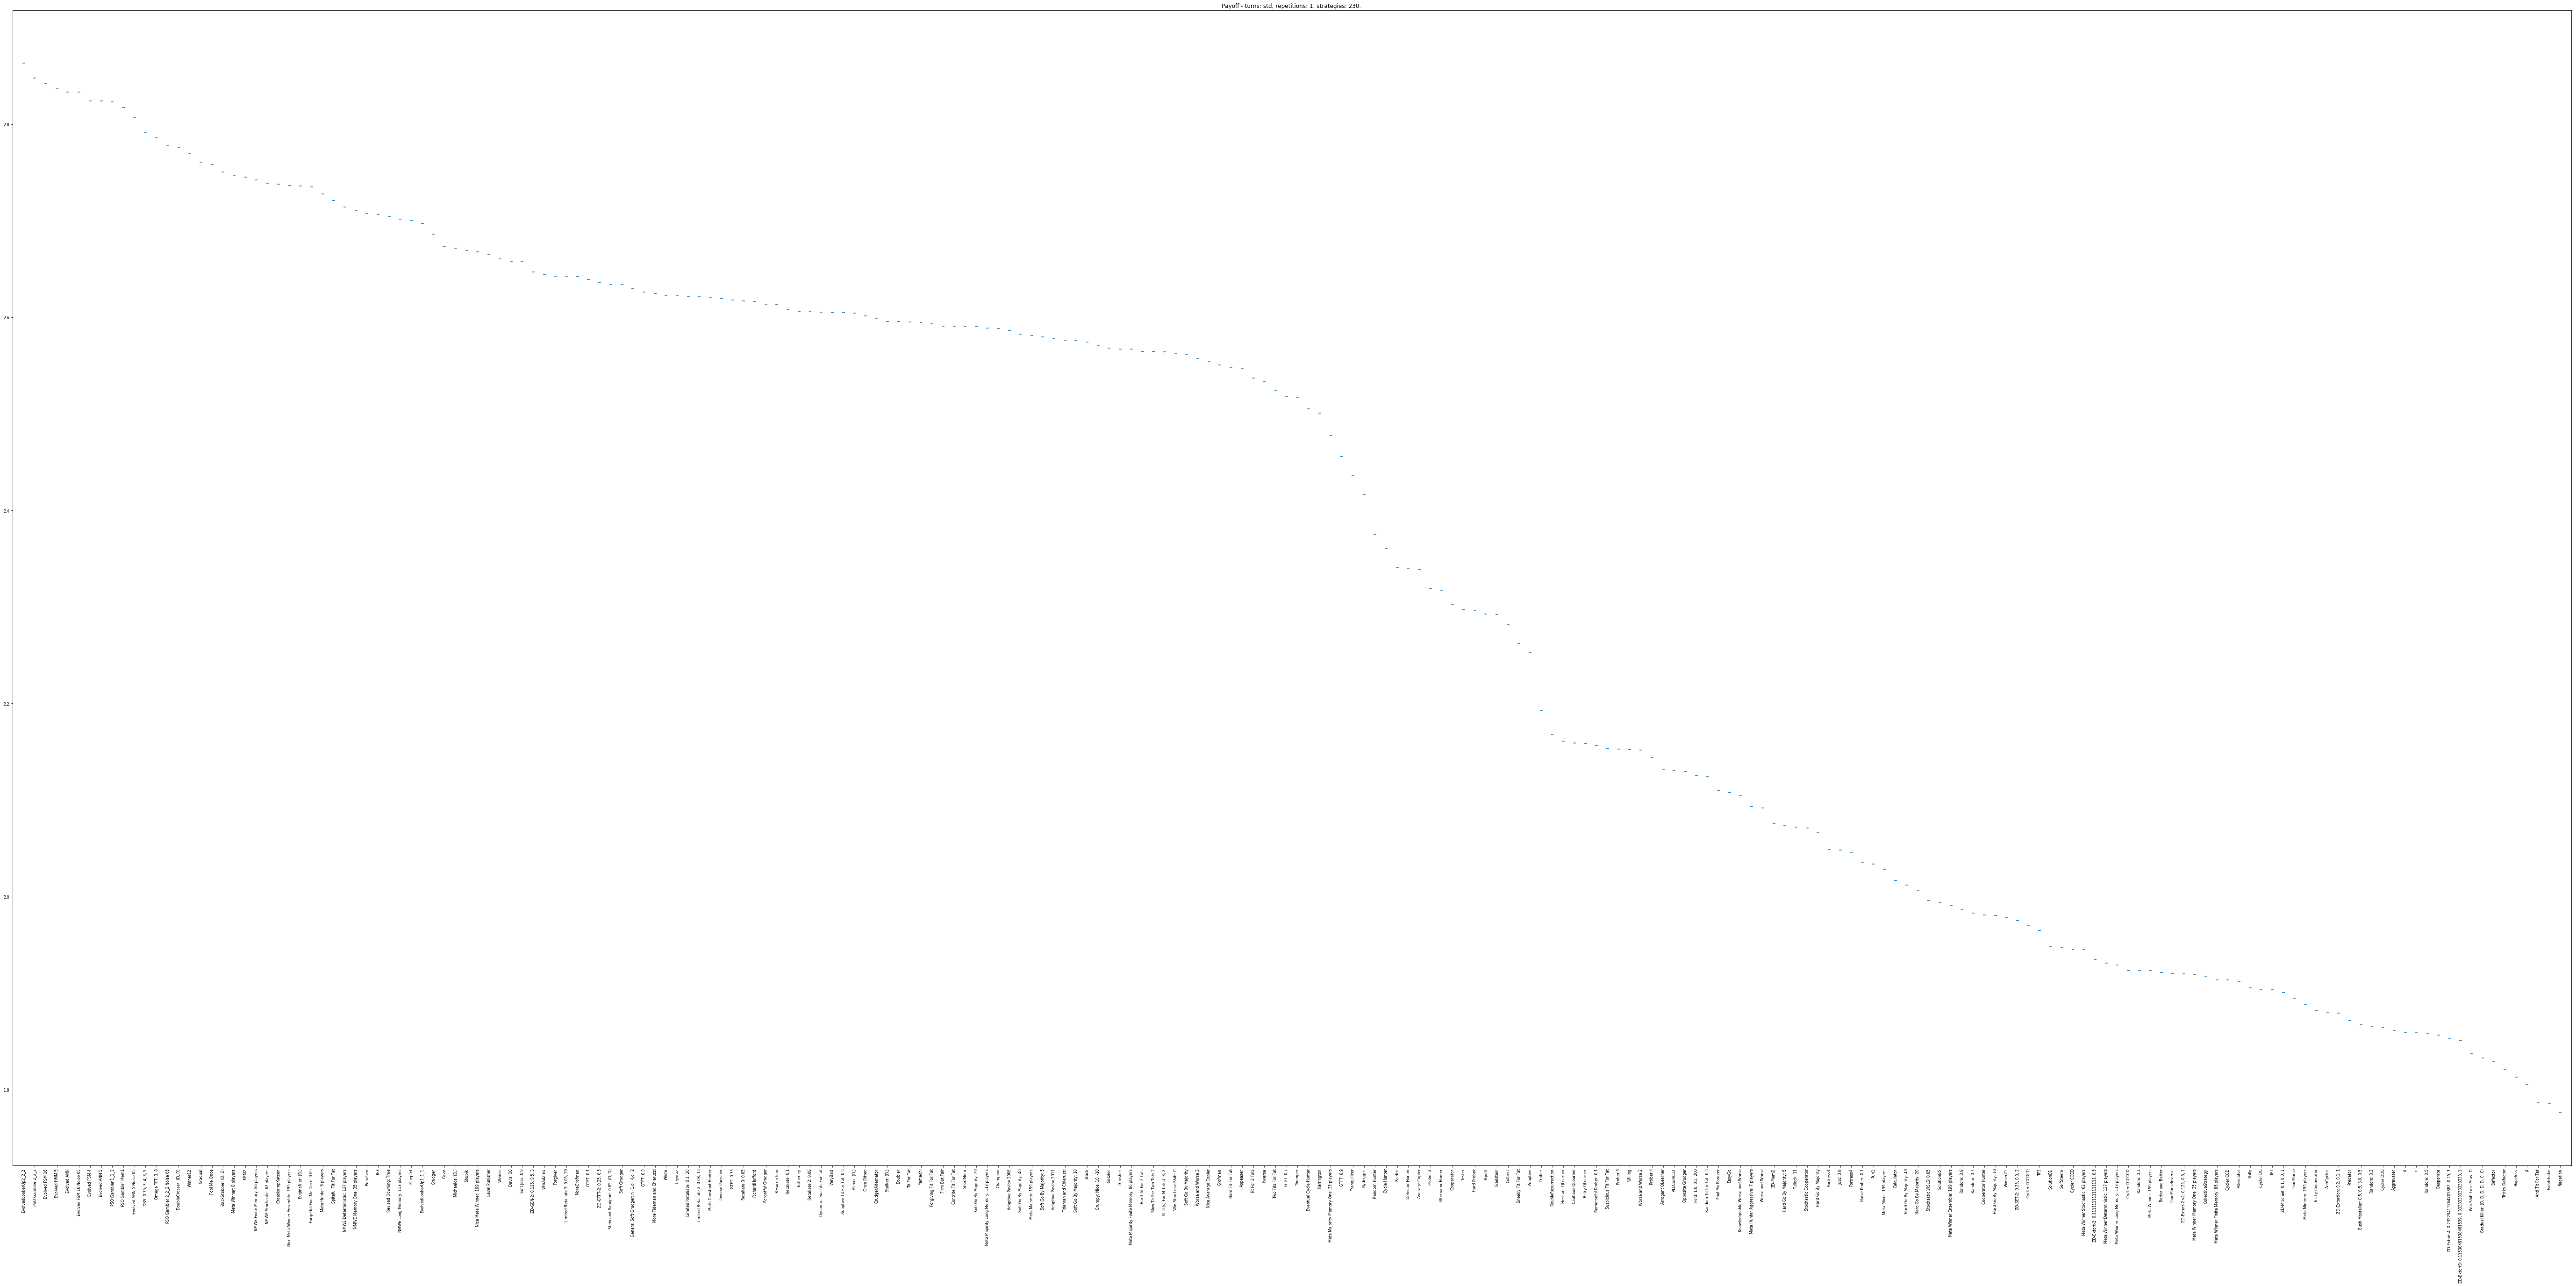

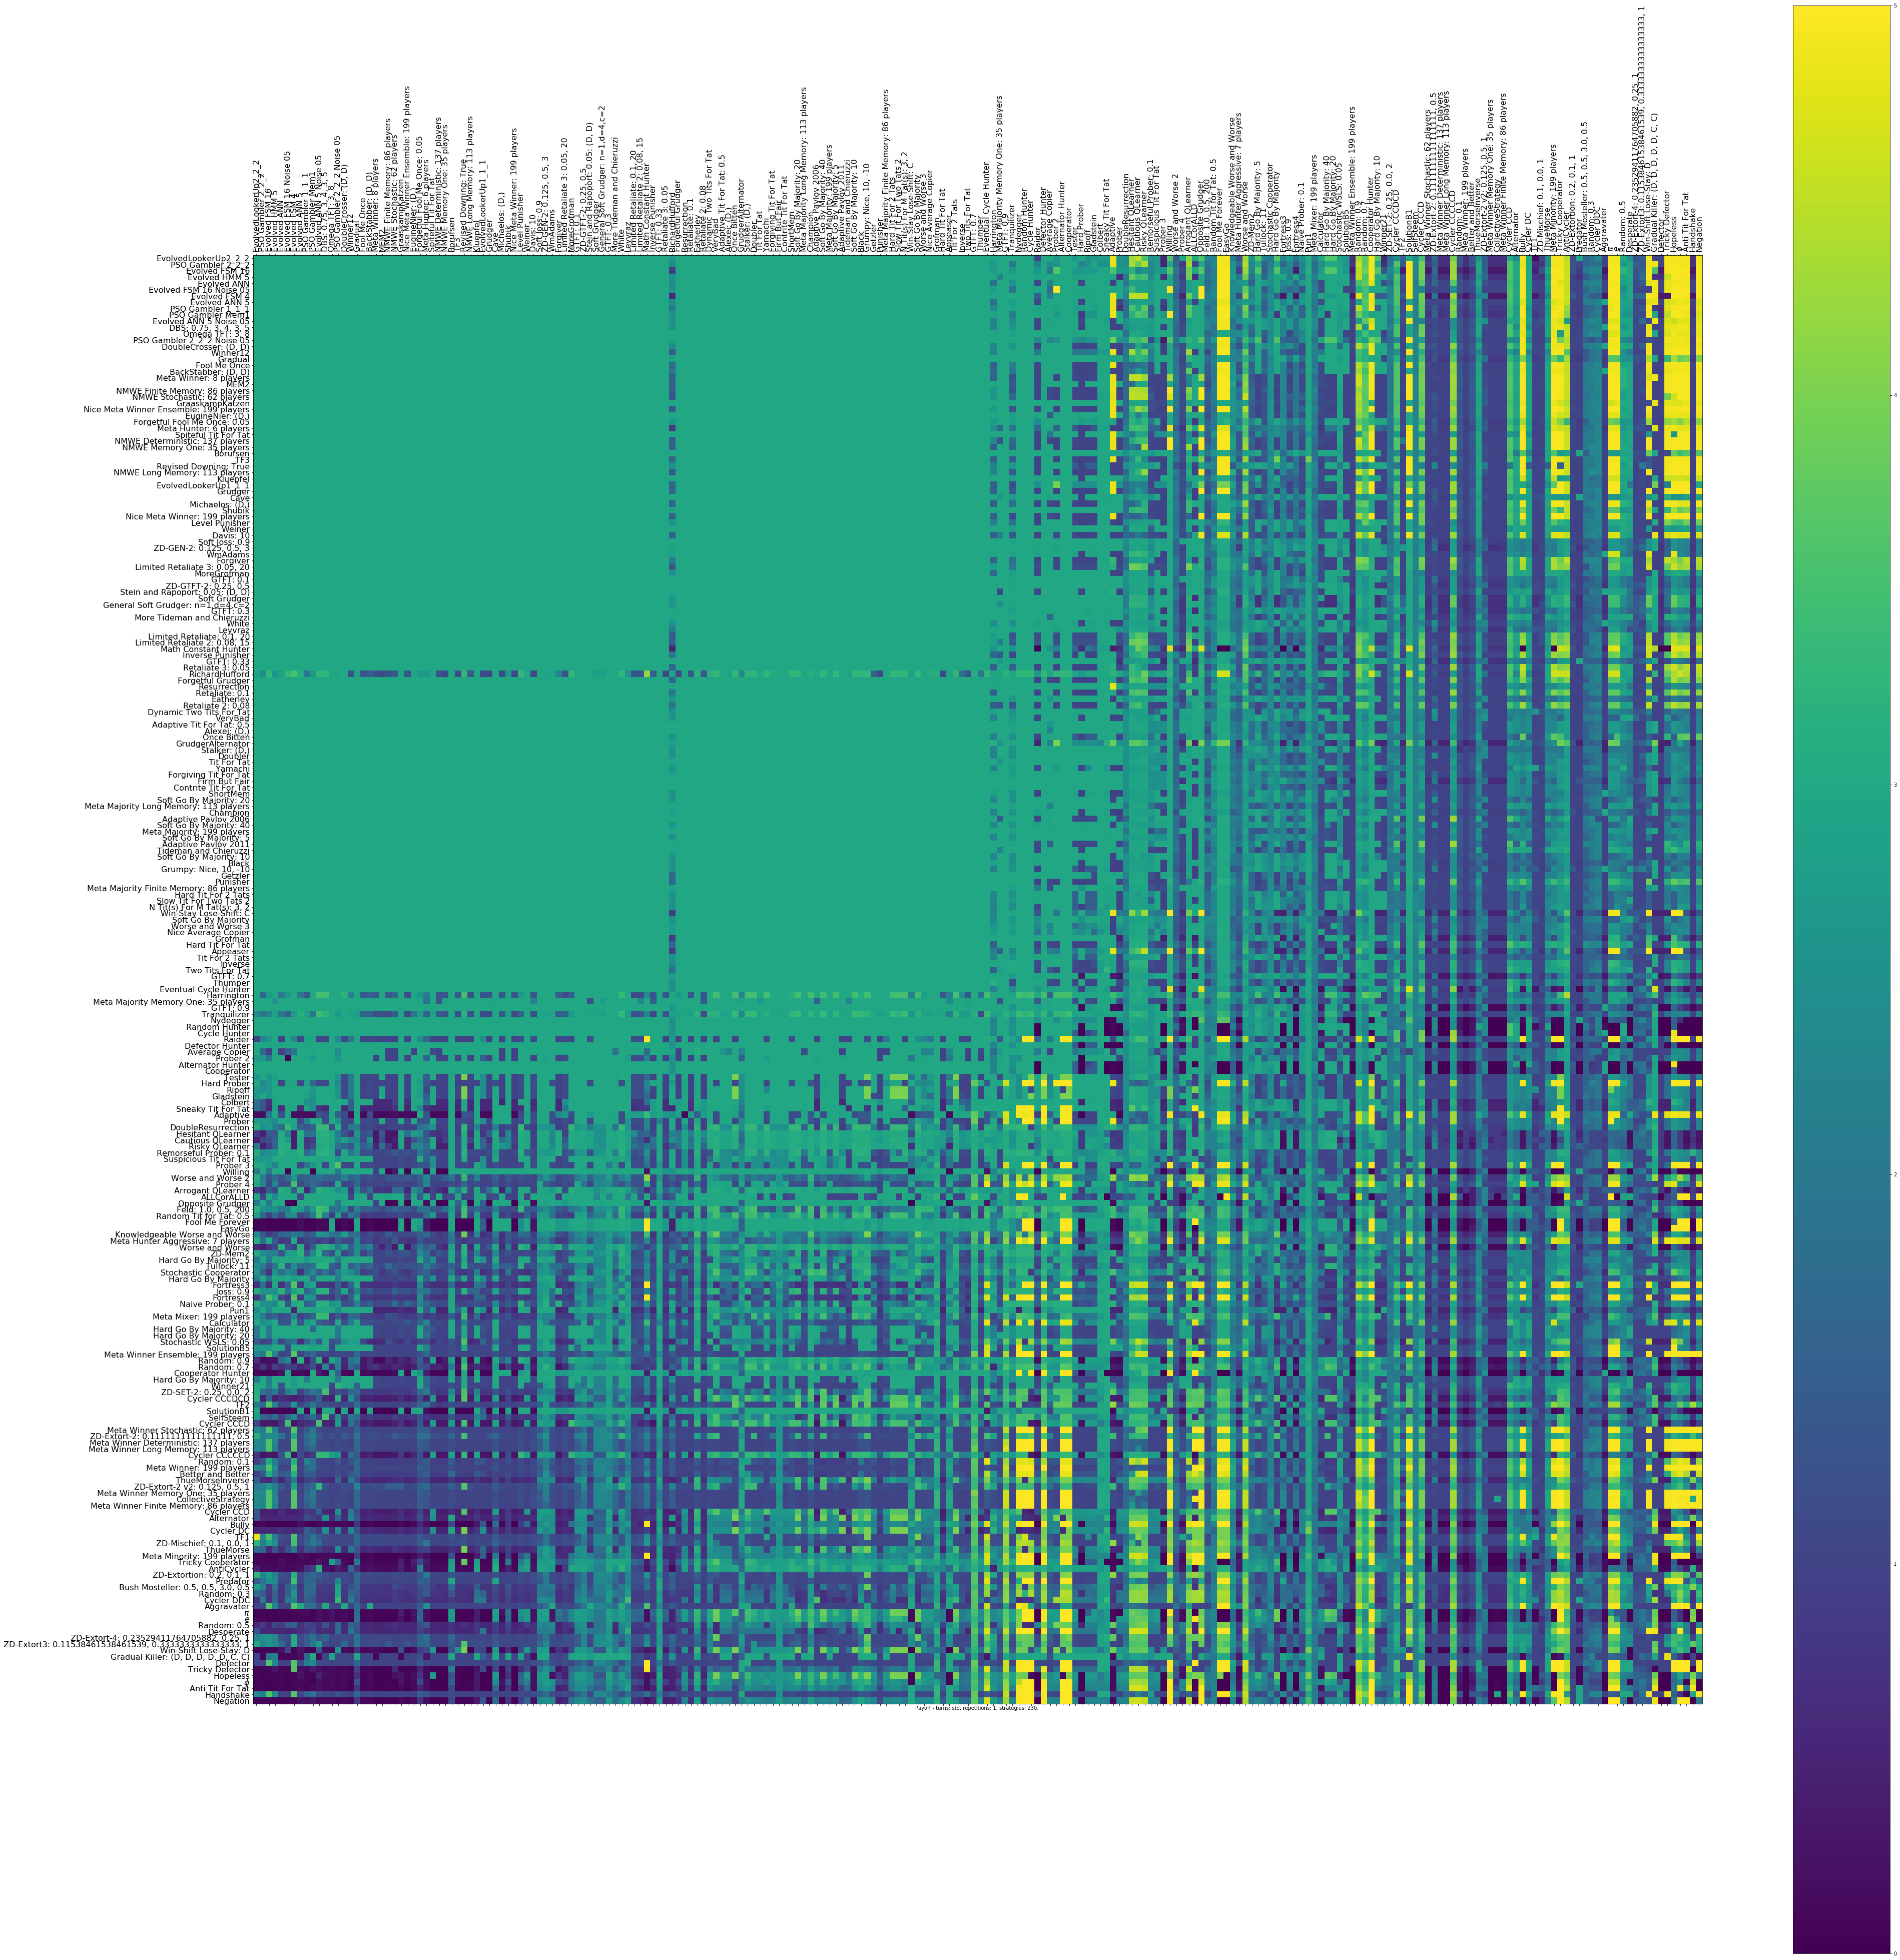

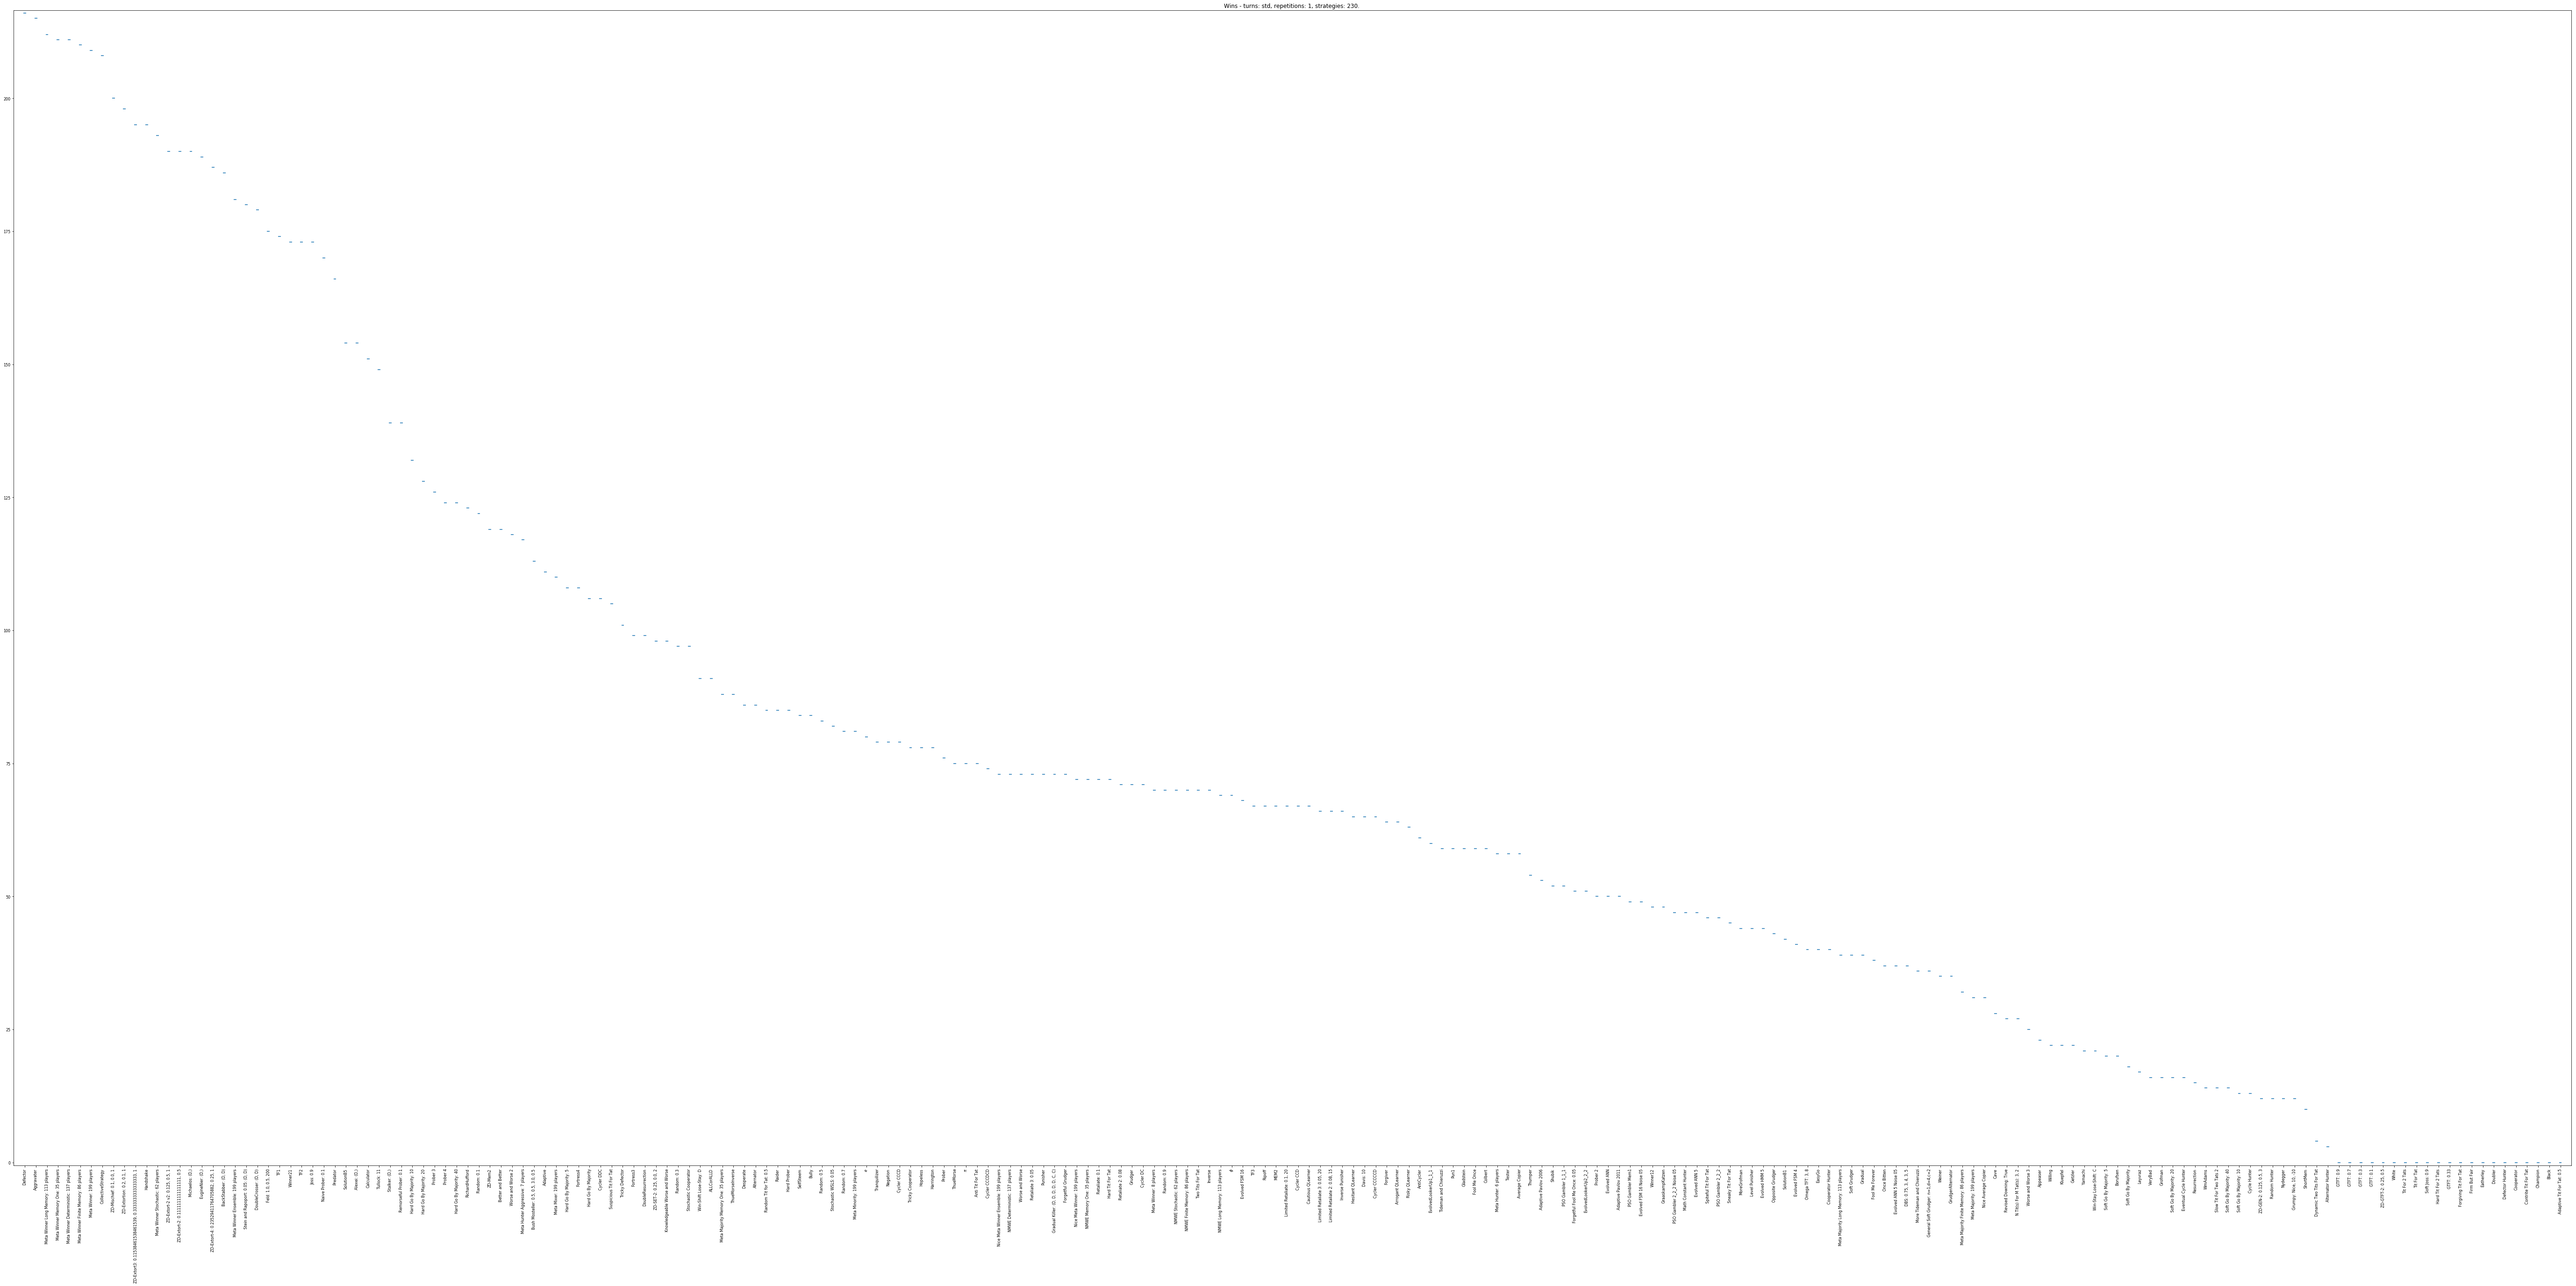

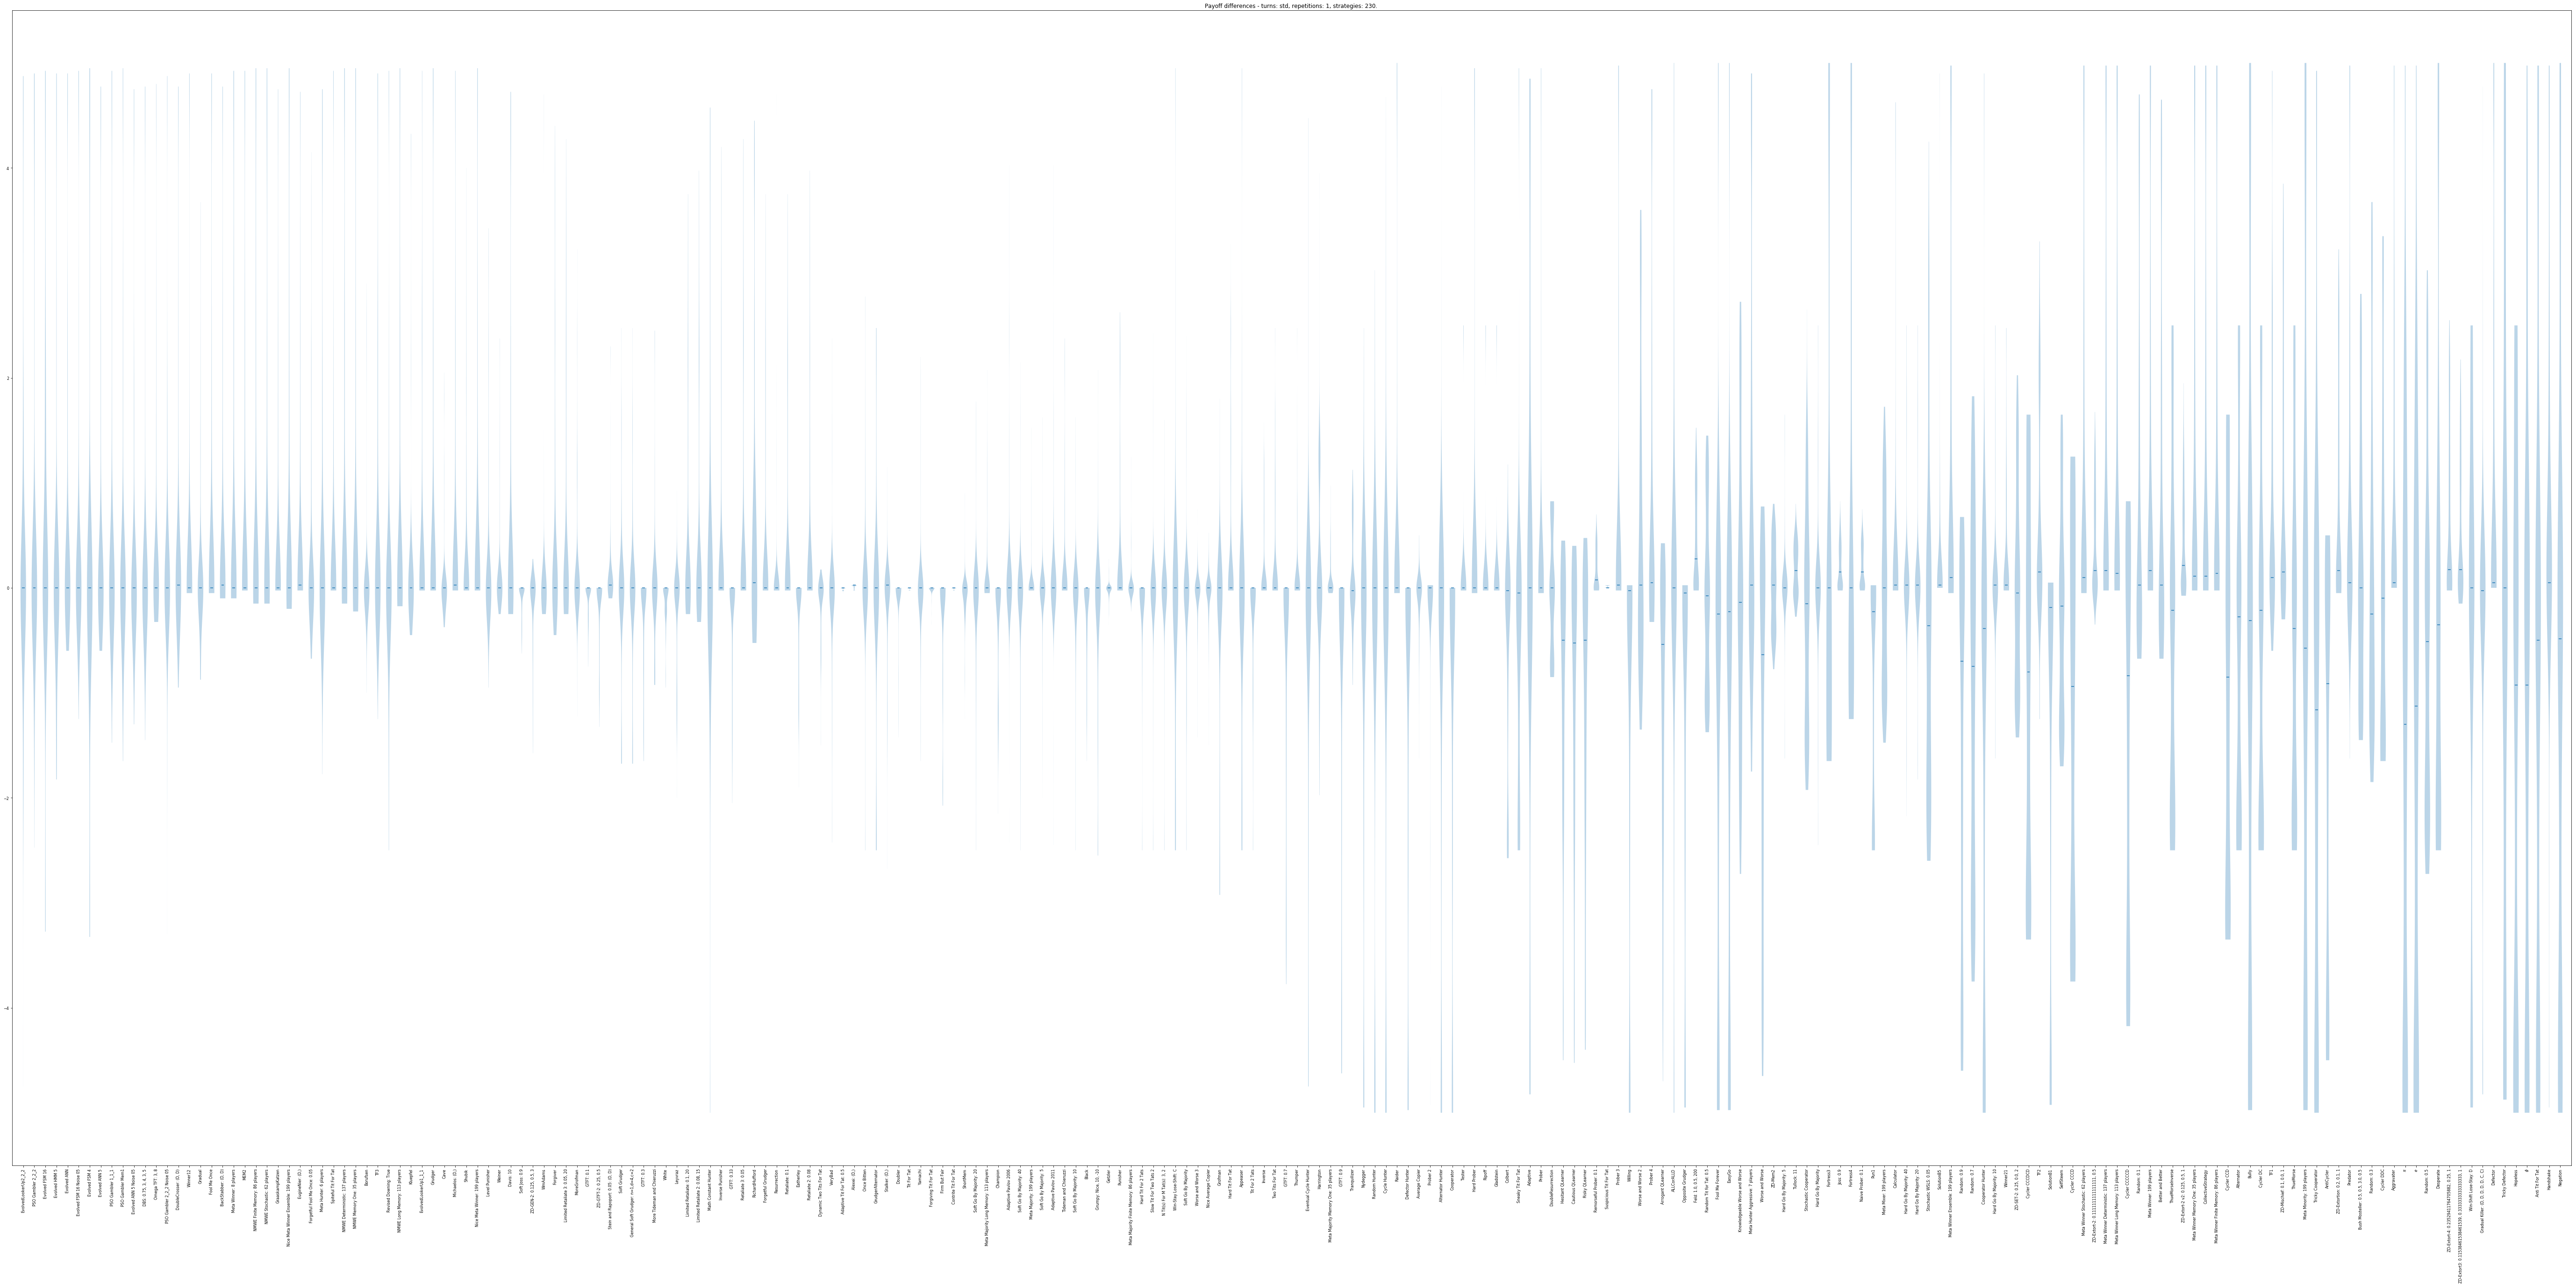

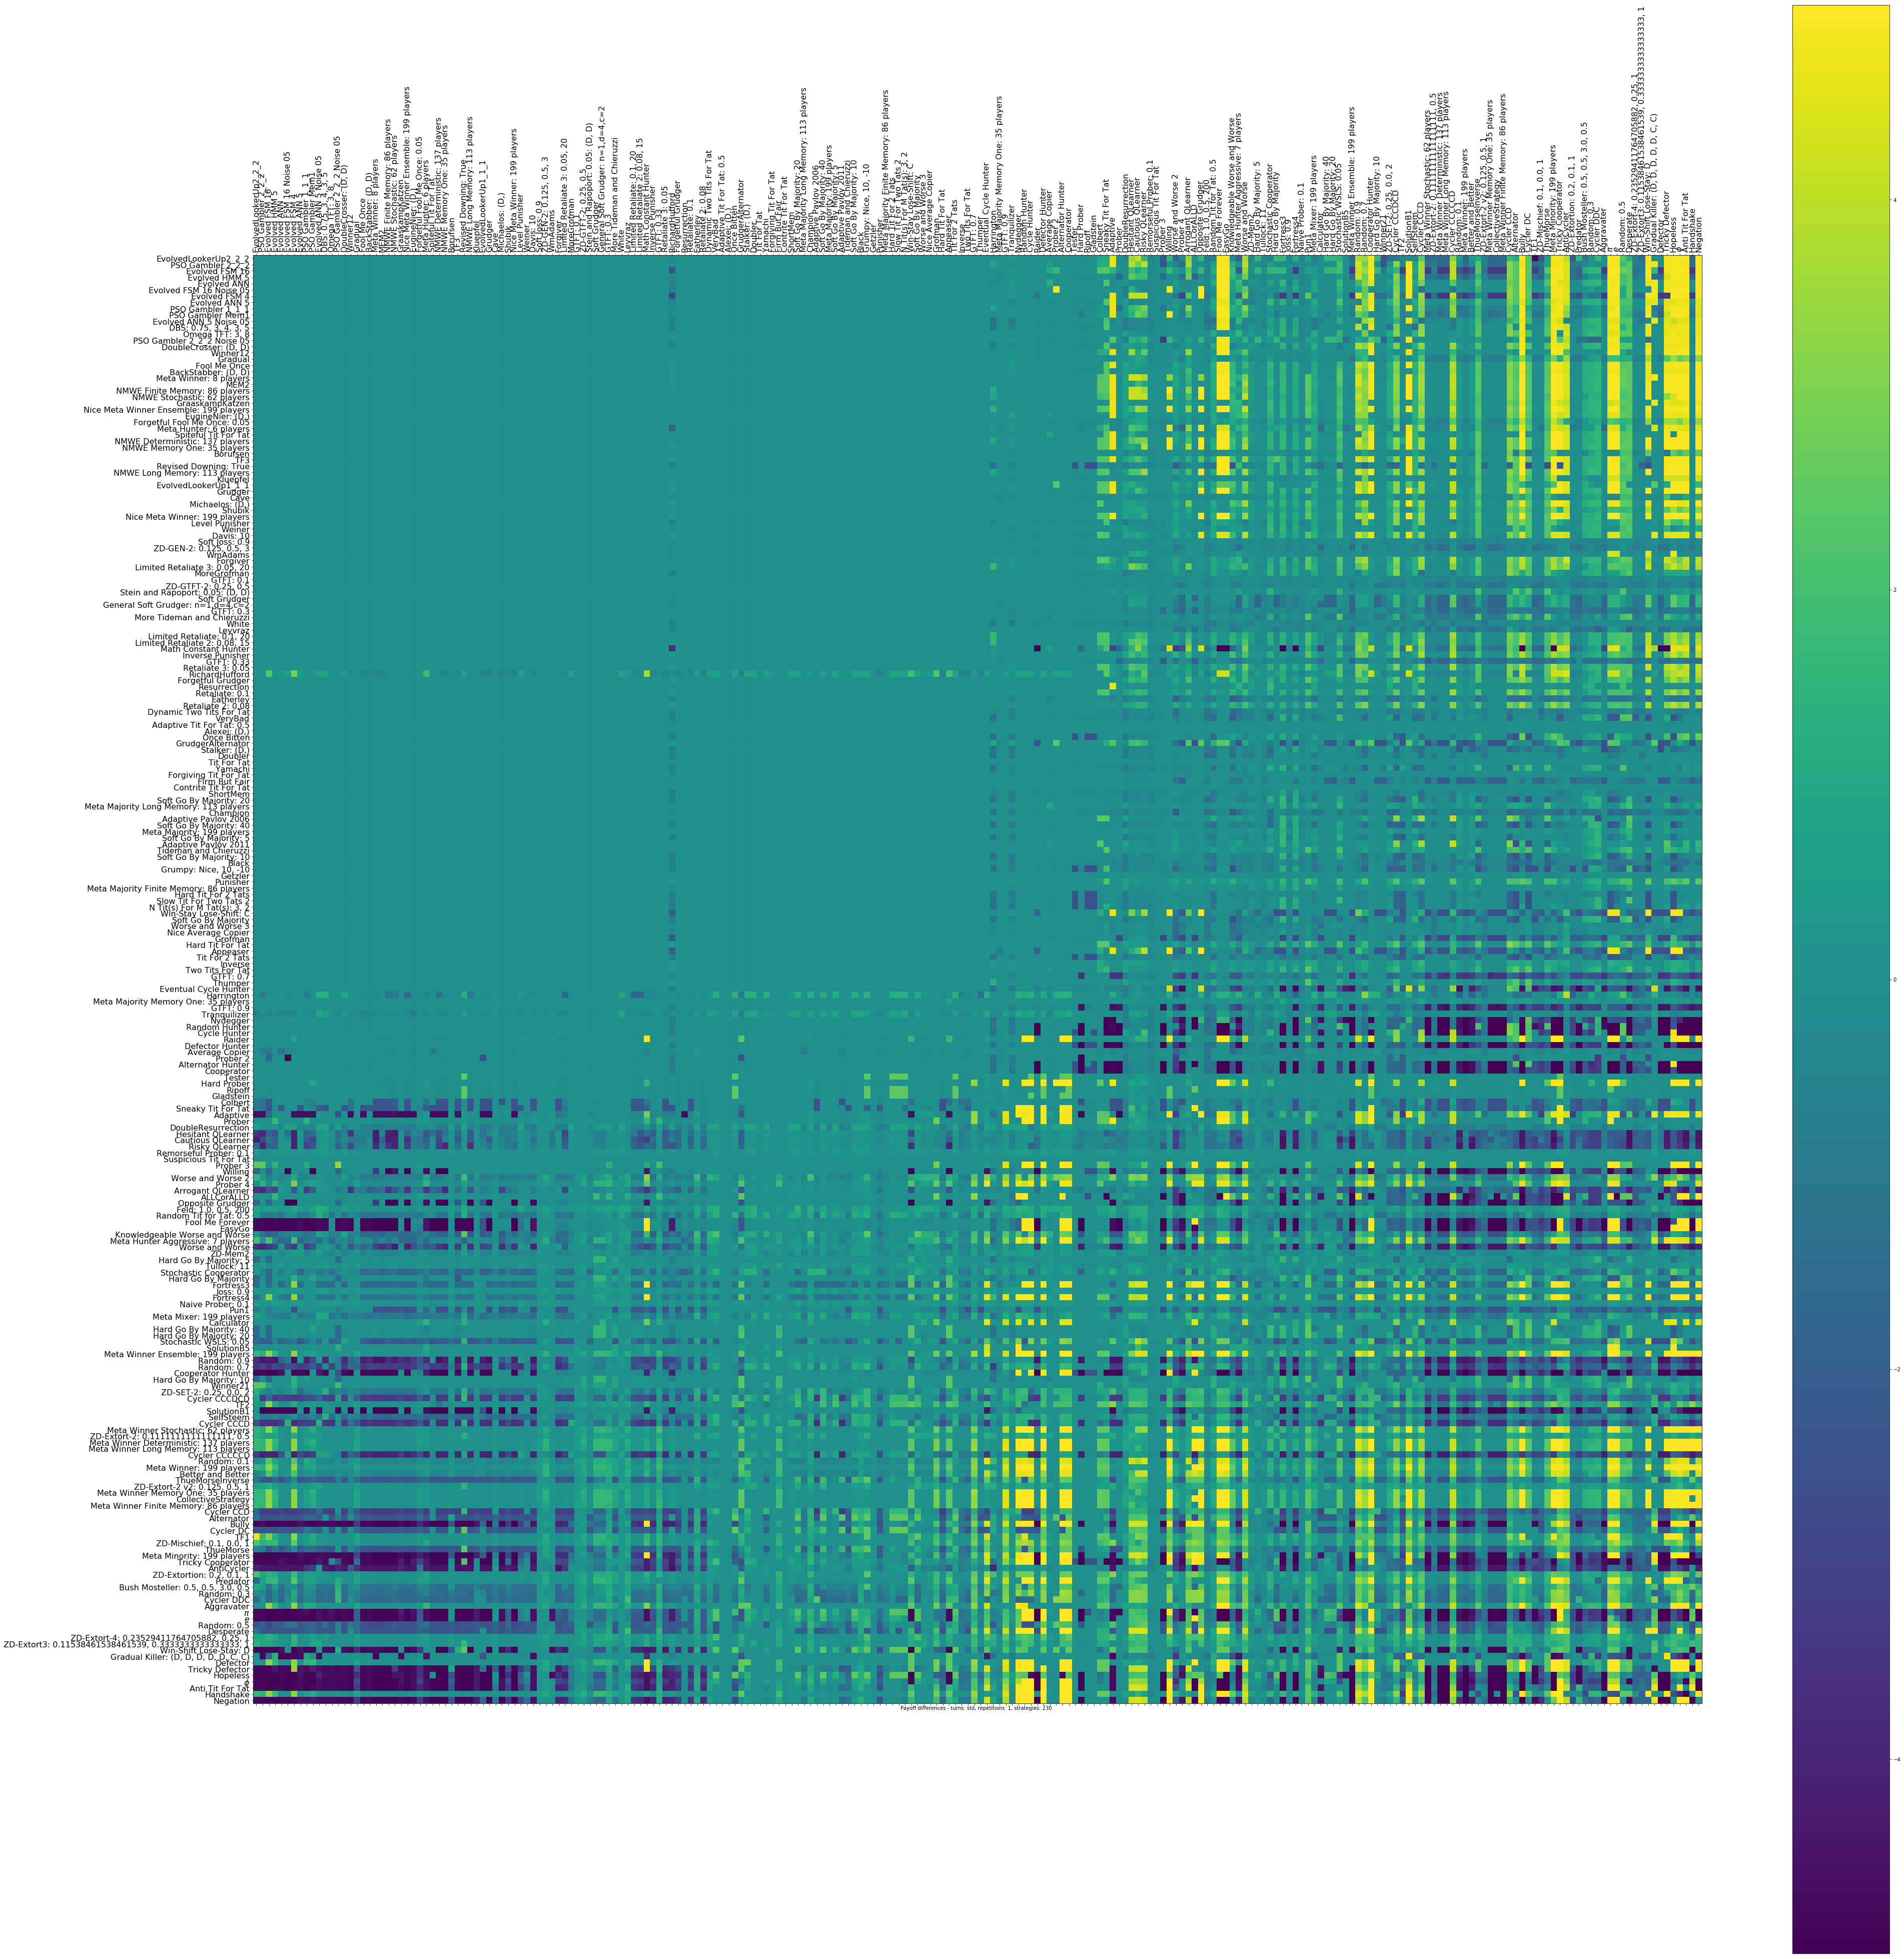

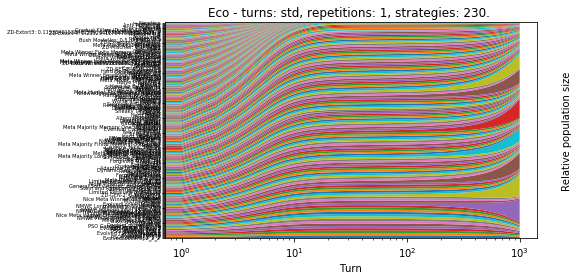

In [13]:
plot = obtain_assets(results, "strategies", "std")
results.write_summary('assets/std_summary.csv')

In [14]:
results_summary = pd.read_csv('assets/std_summary.csv', index_col='Rank')
results_summary.head()

Name  Median_score  Cooperation_rating  Wins  \
Rank                                                                 
0     EvolvedLookerUp2_2_2      2.863515            0.736790  51.0   
1        PSO Gambler 2_2_2      2.847838            0.685153  46.0   
2           Evolved FSM 16      2.841965            0.707555  68.0   
3            Evolved HMM 5      2.836681            0.740830  44.0   
4              Evolved ANN      2.833362            0.693035  50.0   

      Initial_C_rate   CC_rate   CD_rate   DC_rate   DD_rate  CC_to_C_rate  \
Rank                                                                         
0                1.0  0.663013  0.073777  0.152817  0.110393      0.856897   
1                1.0  0.612249  0.072904  0.174061  0.140786      0.880447   
2                1.0  0.616070  0.091485  0.175328  0.117118      0.828559   
3                1.0  0.688952  0.051878  0.127664  0.131507      0.997841   
4                1.0  0.679017  0.014017  0.122336  0.184629      0.984962   

      CD_to_C_rate  DC_to_C_rate  DD_to_C_rate  
Rank                                            
0         0.489110      0.644774      0.847980  
1         0.415485      0.591645      0.432551  
2         0.603764      0.527803      0.363322  
3         0.538858      0.042056      0.225646  
4         0.751921      0.426044      0.000000

In [15]:
bad_strategies = set(results_summary[results_summary['Initial_C_rate'] != 1]['Name'])
print(len(bad_strategies))

53


In [16]:
# filter out 
good_players = [p for p in players if p.name not in bad_strategies]
print(len(good_players))

187


In [11]:
#[a for a in bad_strategies]

In [18]:
plot = axl.Plot(results)
help(plot.boxplot)

Help on method boxplot in module axelrod.plot:

boxplot(title:List[str]=None, ax:matplotlib.axes._subplots.SubplotBase=None) -> matplotlib.figure.Figure method of axelrod.plot.Plot instance
    For the specific mean score boxplot.



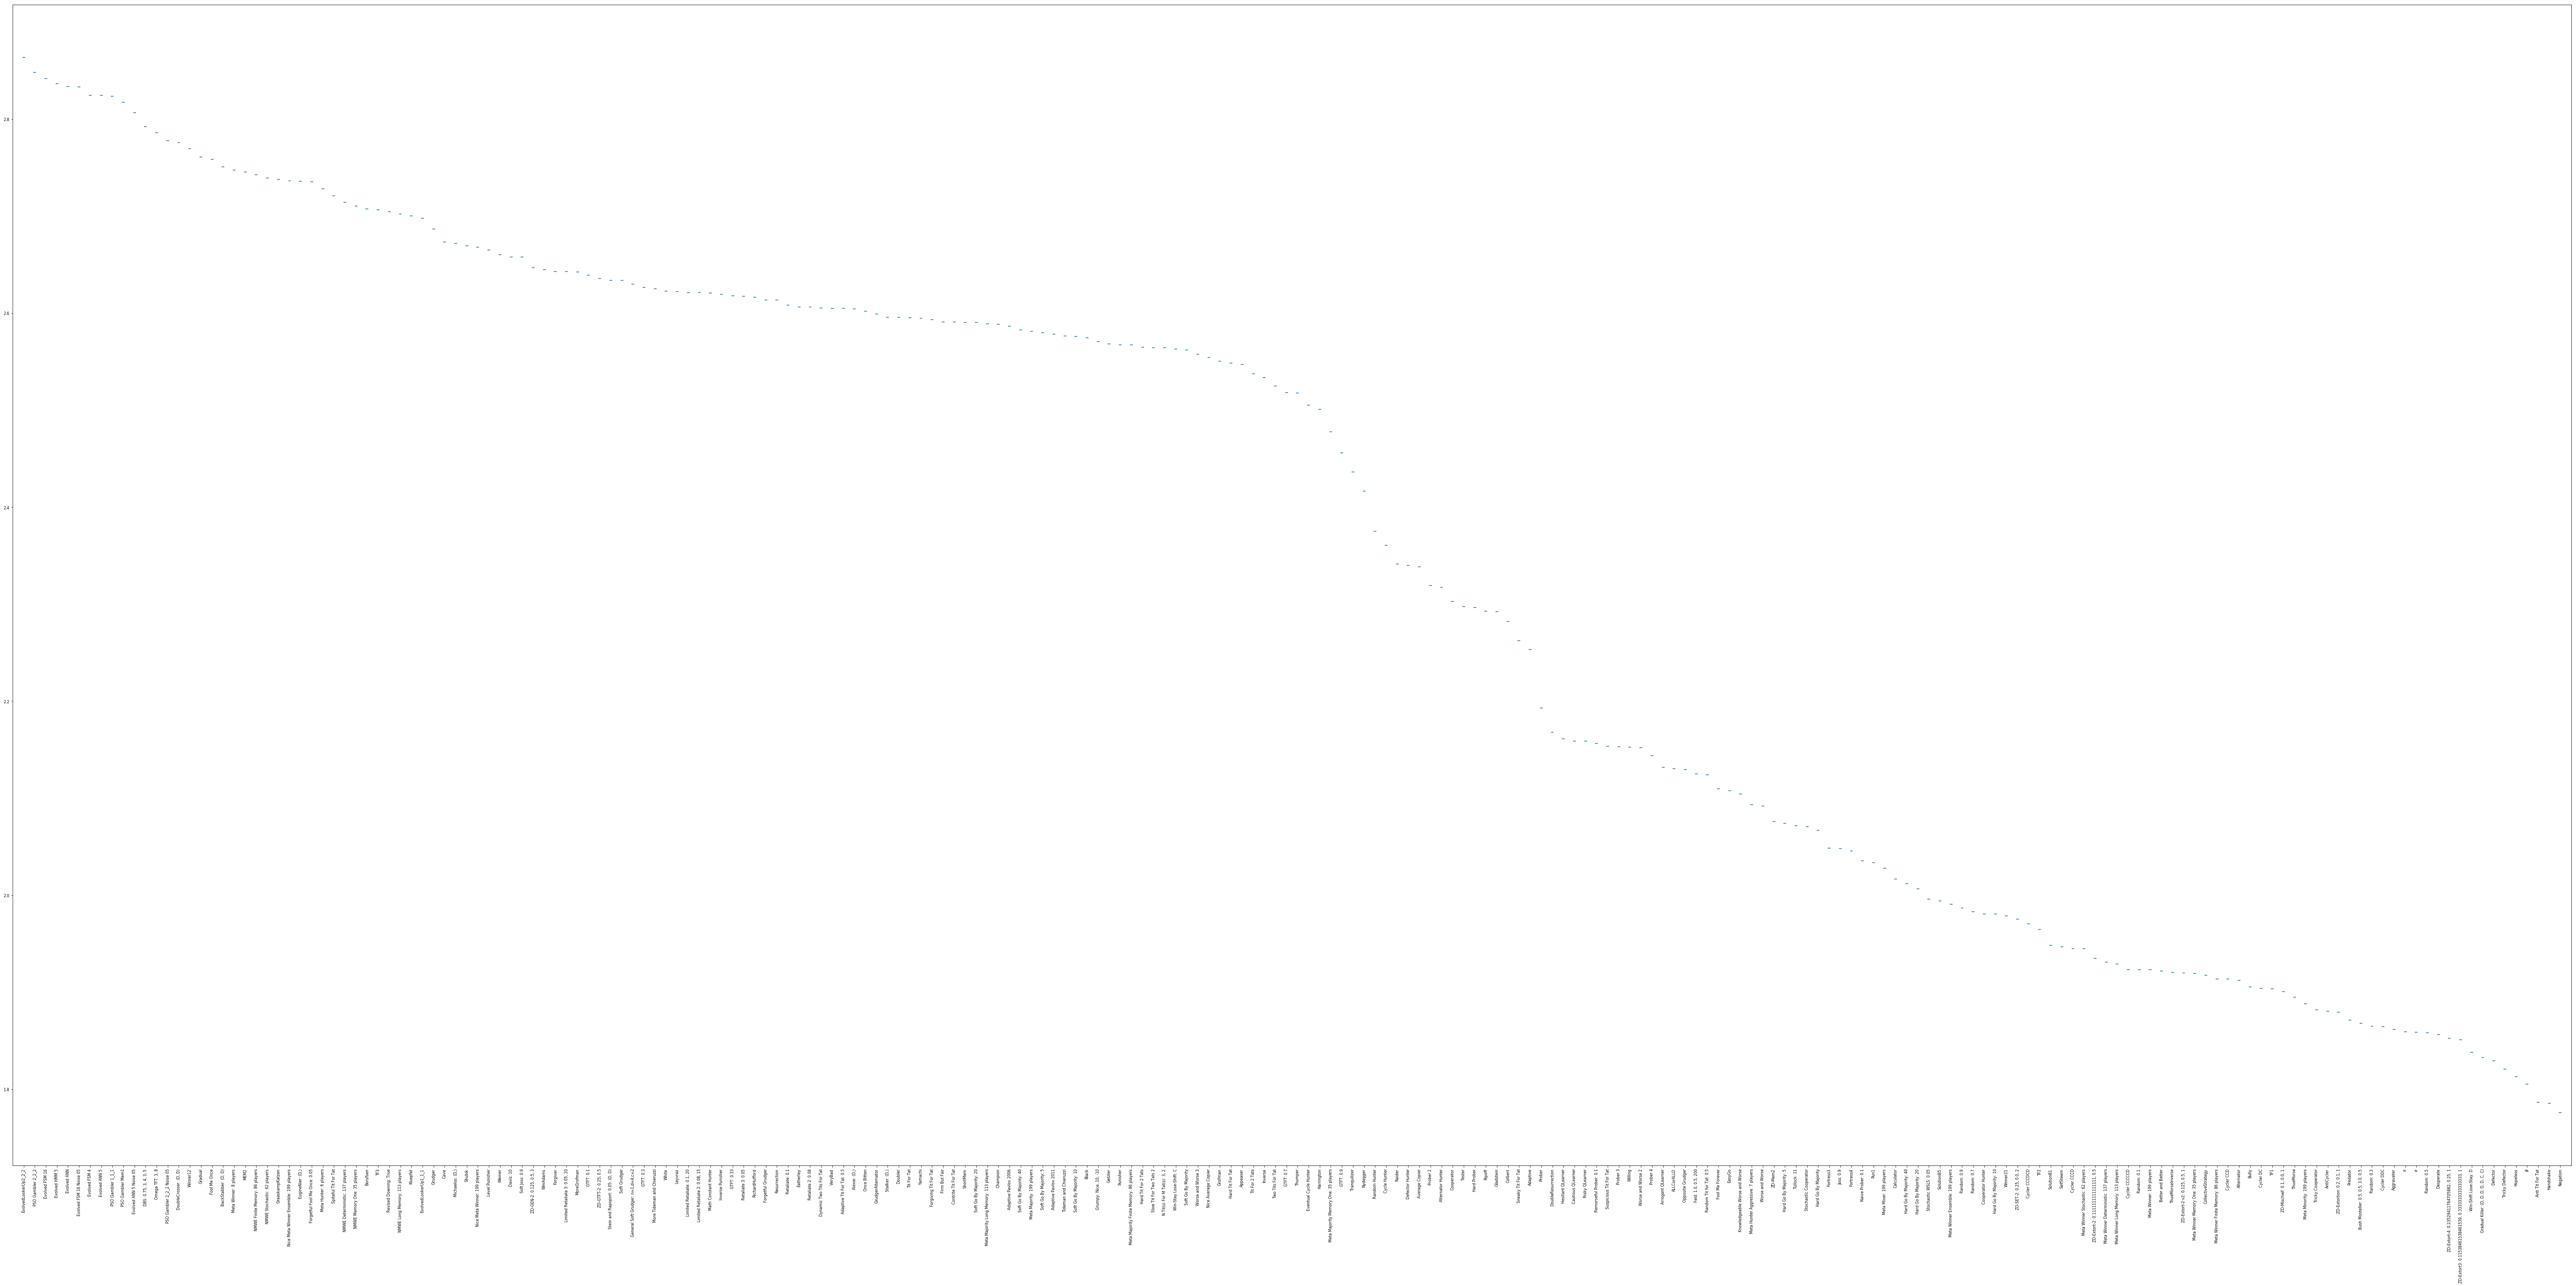

In [19]:
boxplot = plot.boxplot()

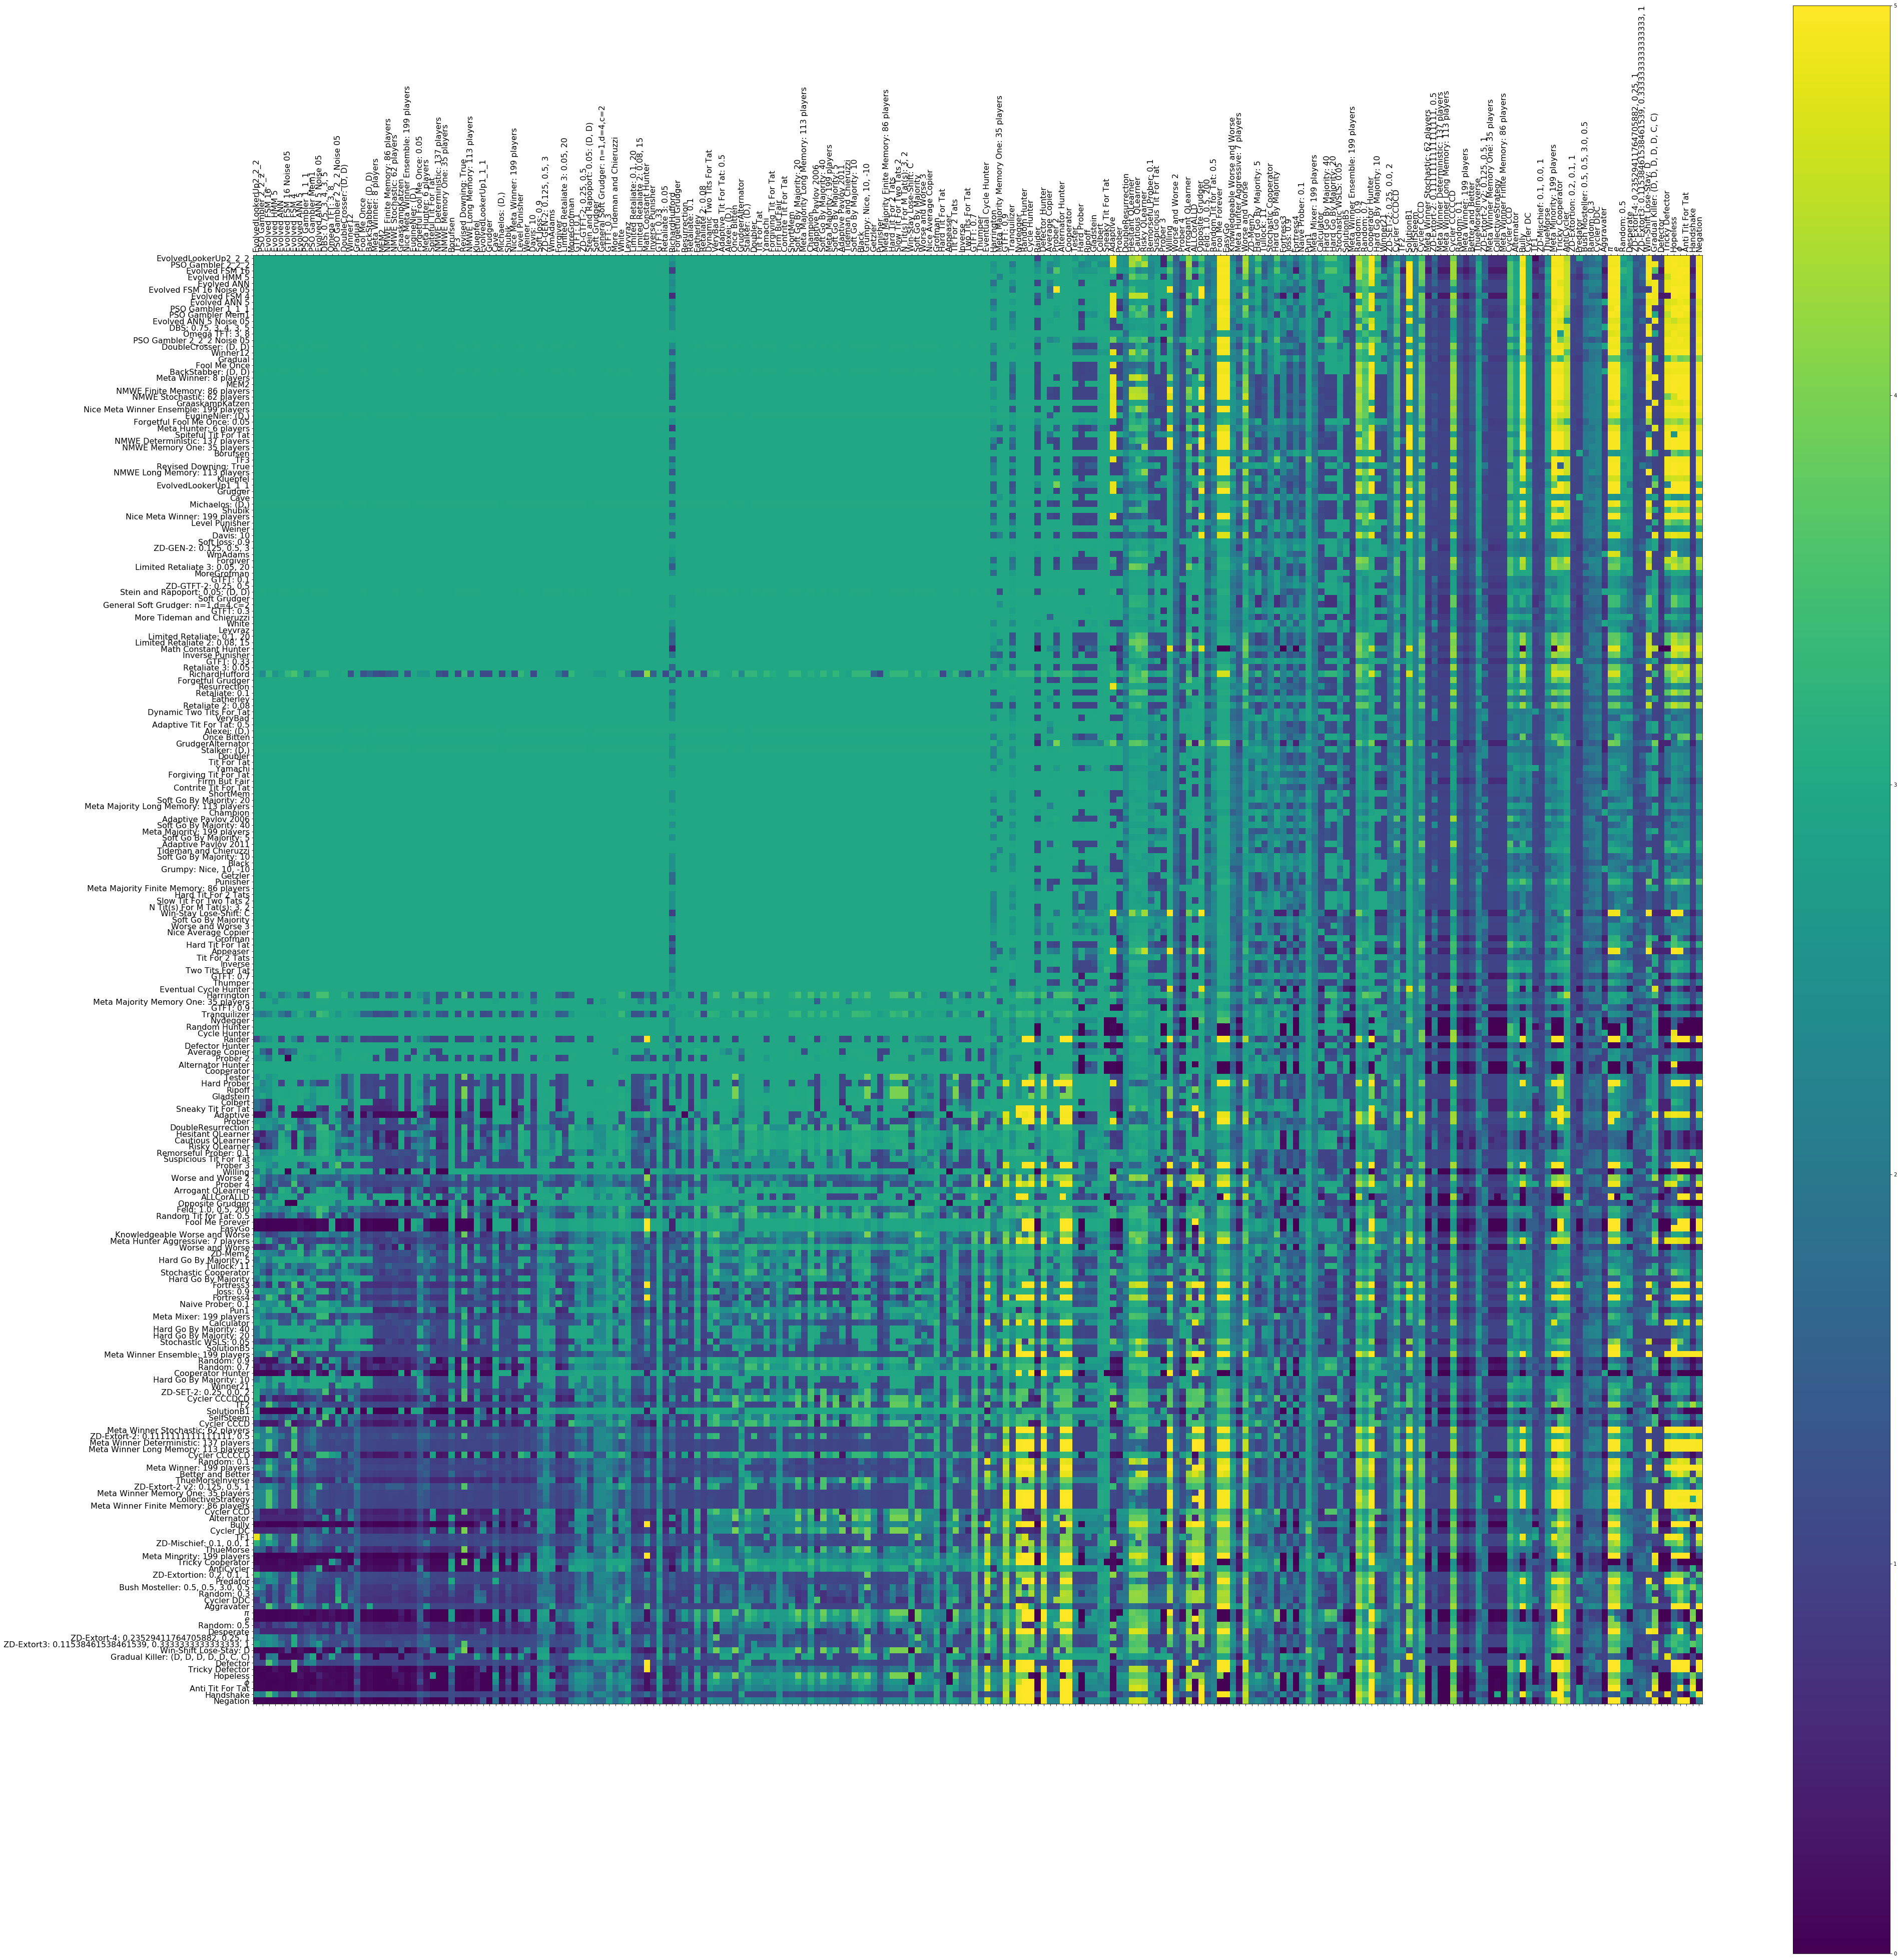

In [20]:
payoff = plot.payoff()










Playing matches:   2%|▏         | 403/17578 [00:02<01:46, 161.24it/s]Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Obtaining plots: 100%|██████████| 6/6 [01:09<00:00, 16.66s/it]

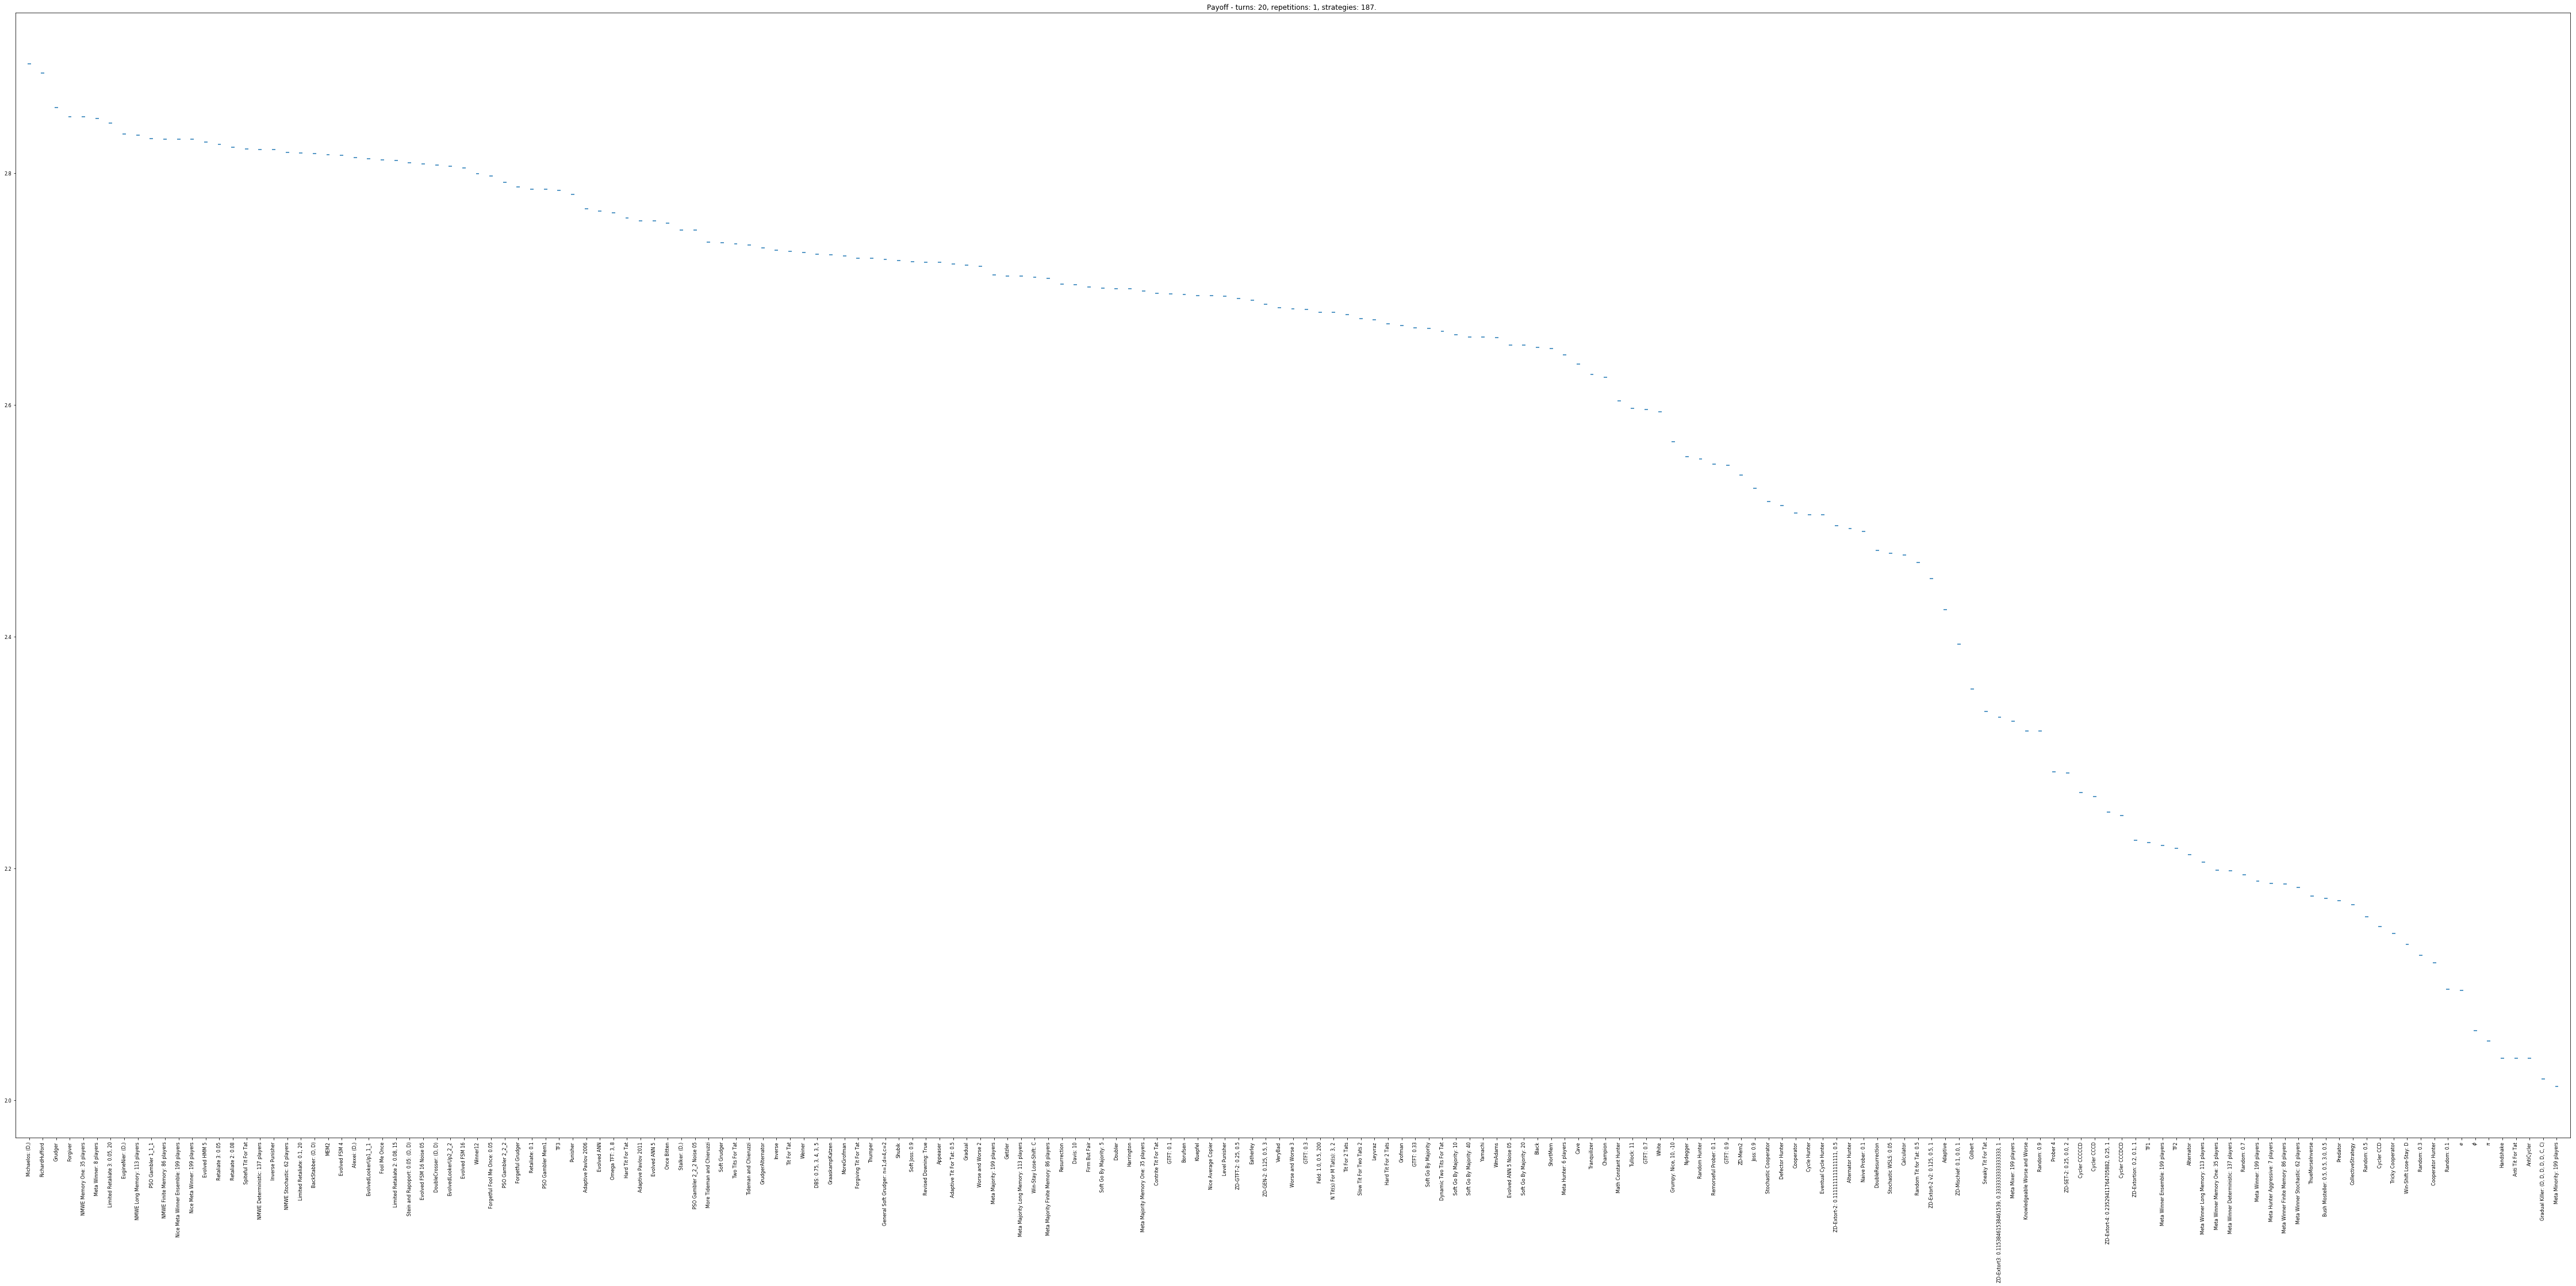

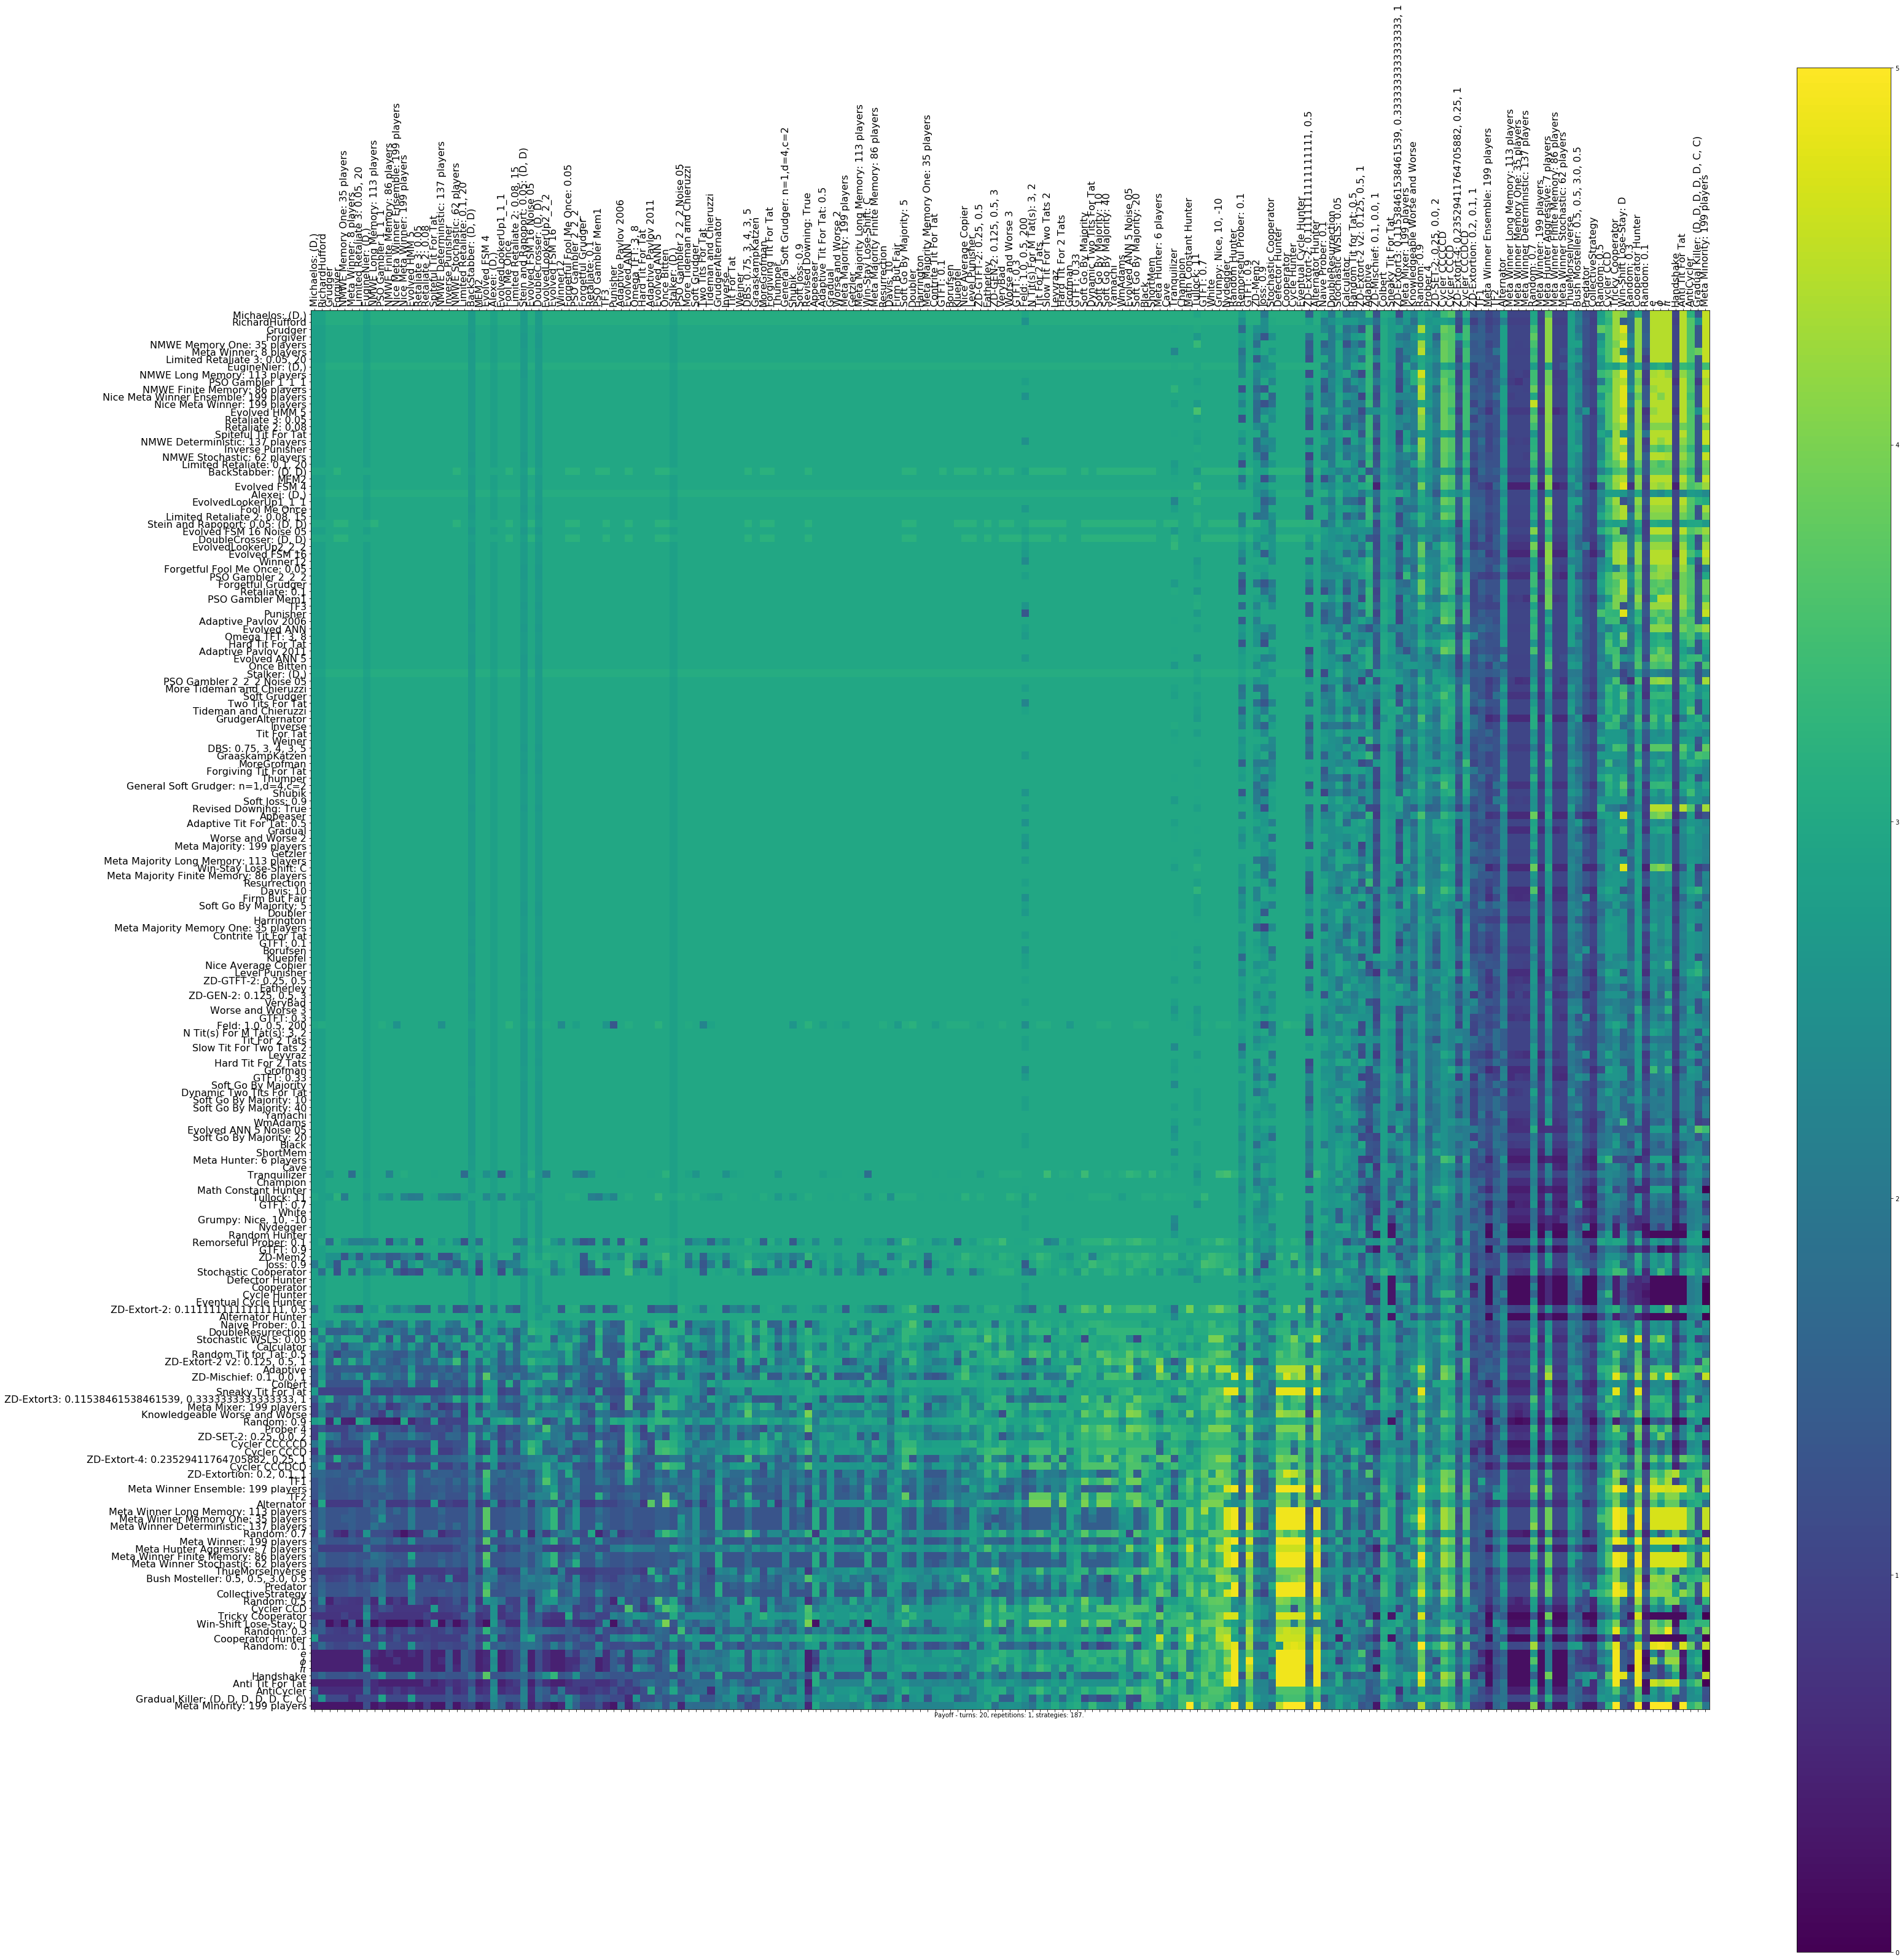

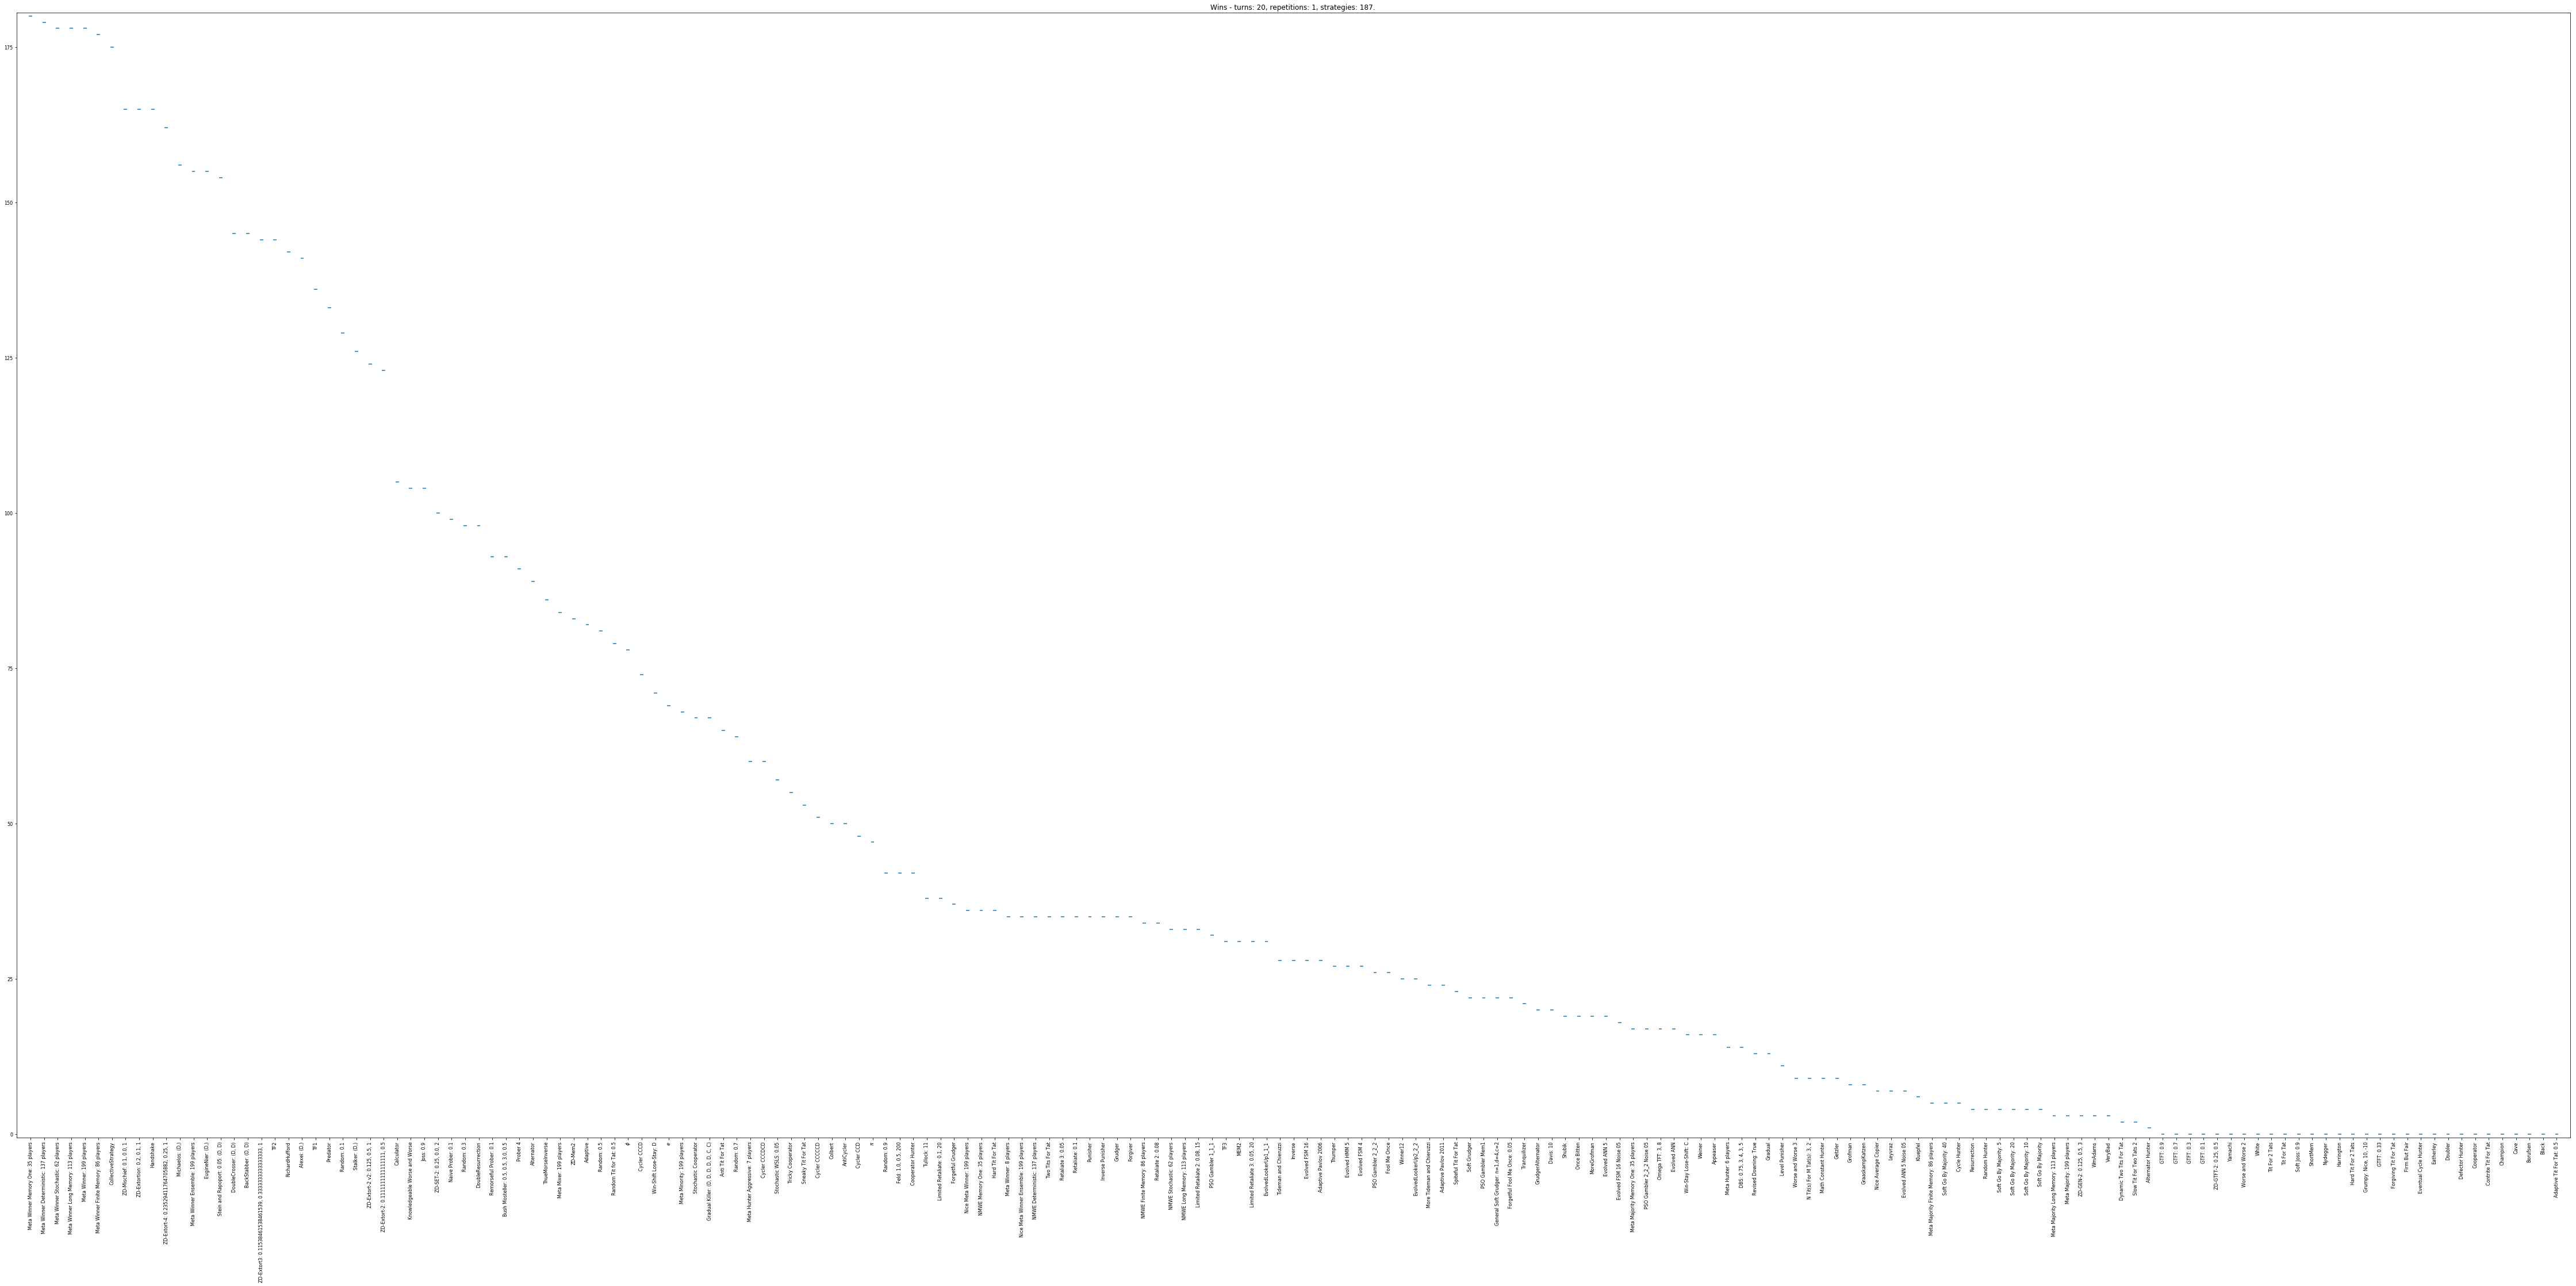

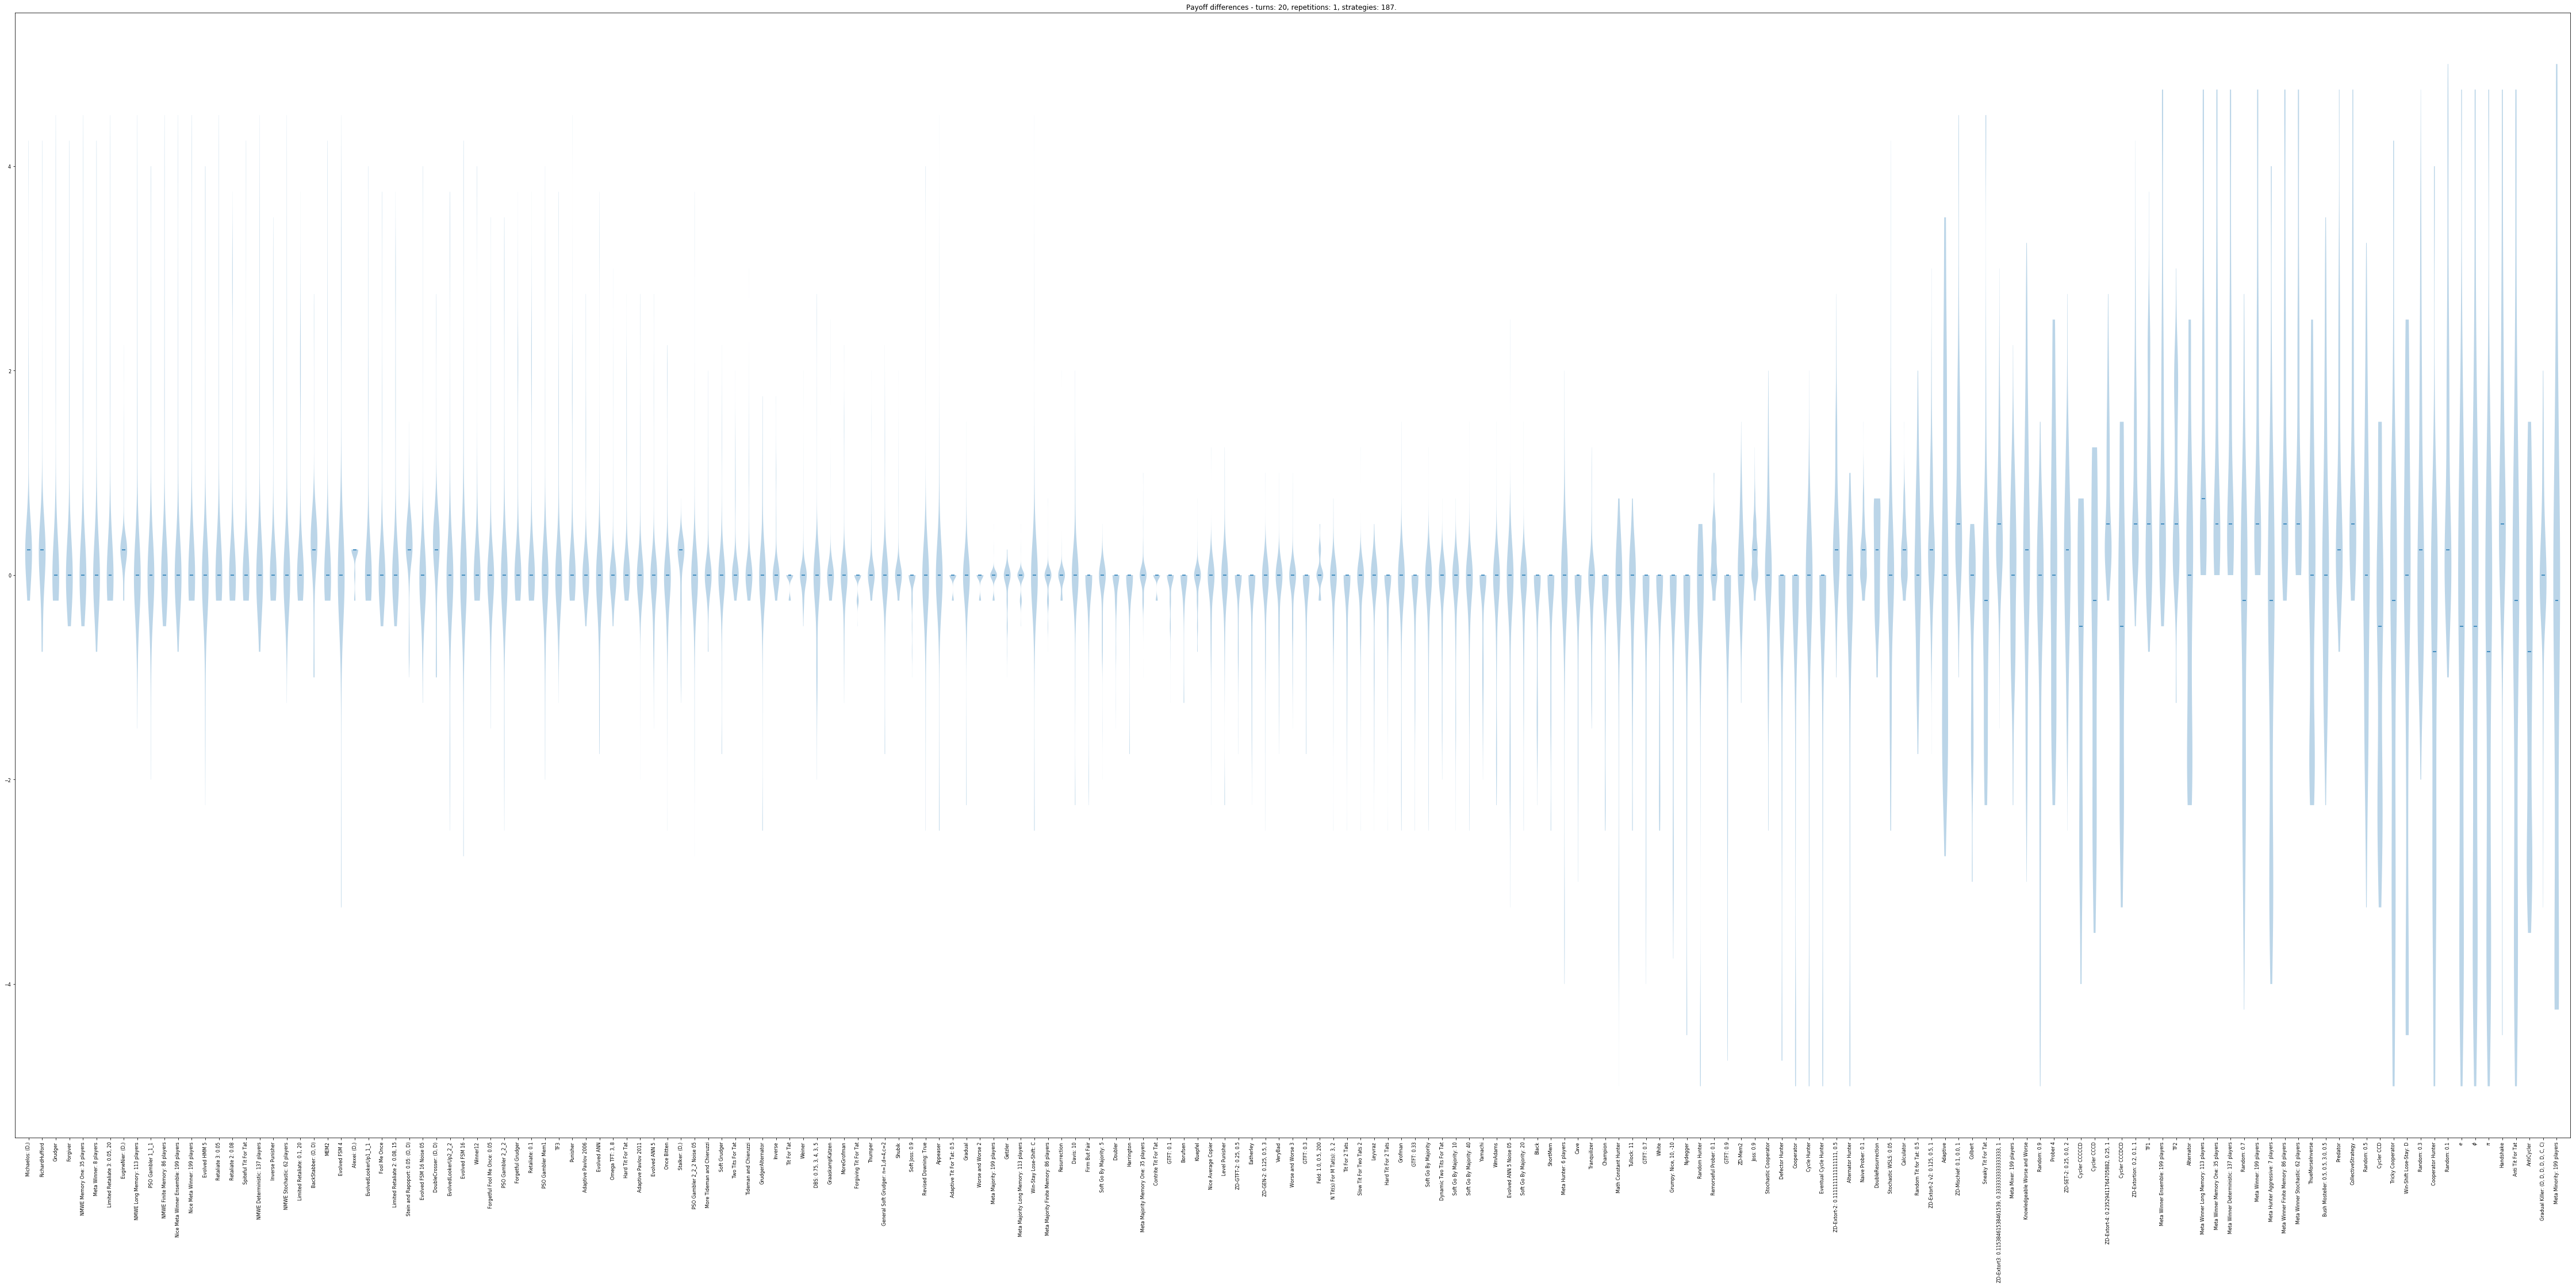

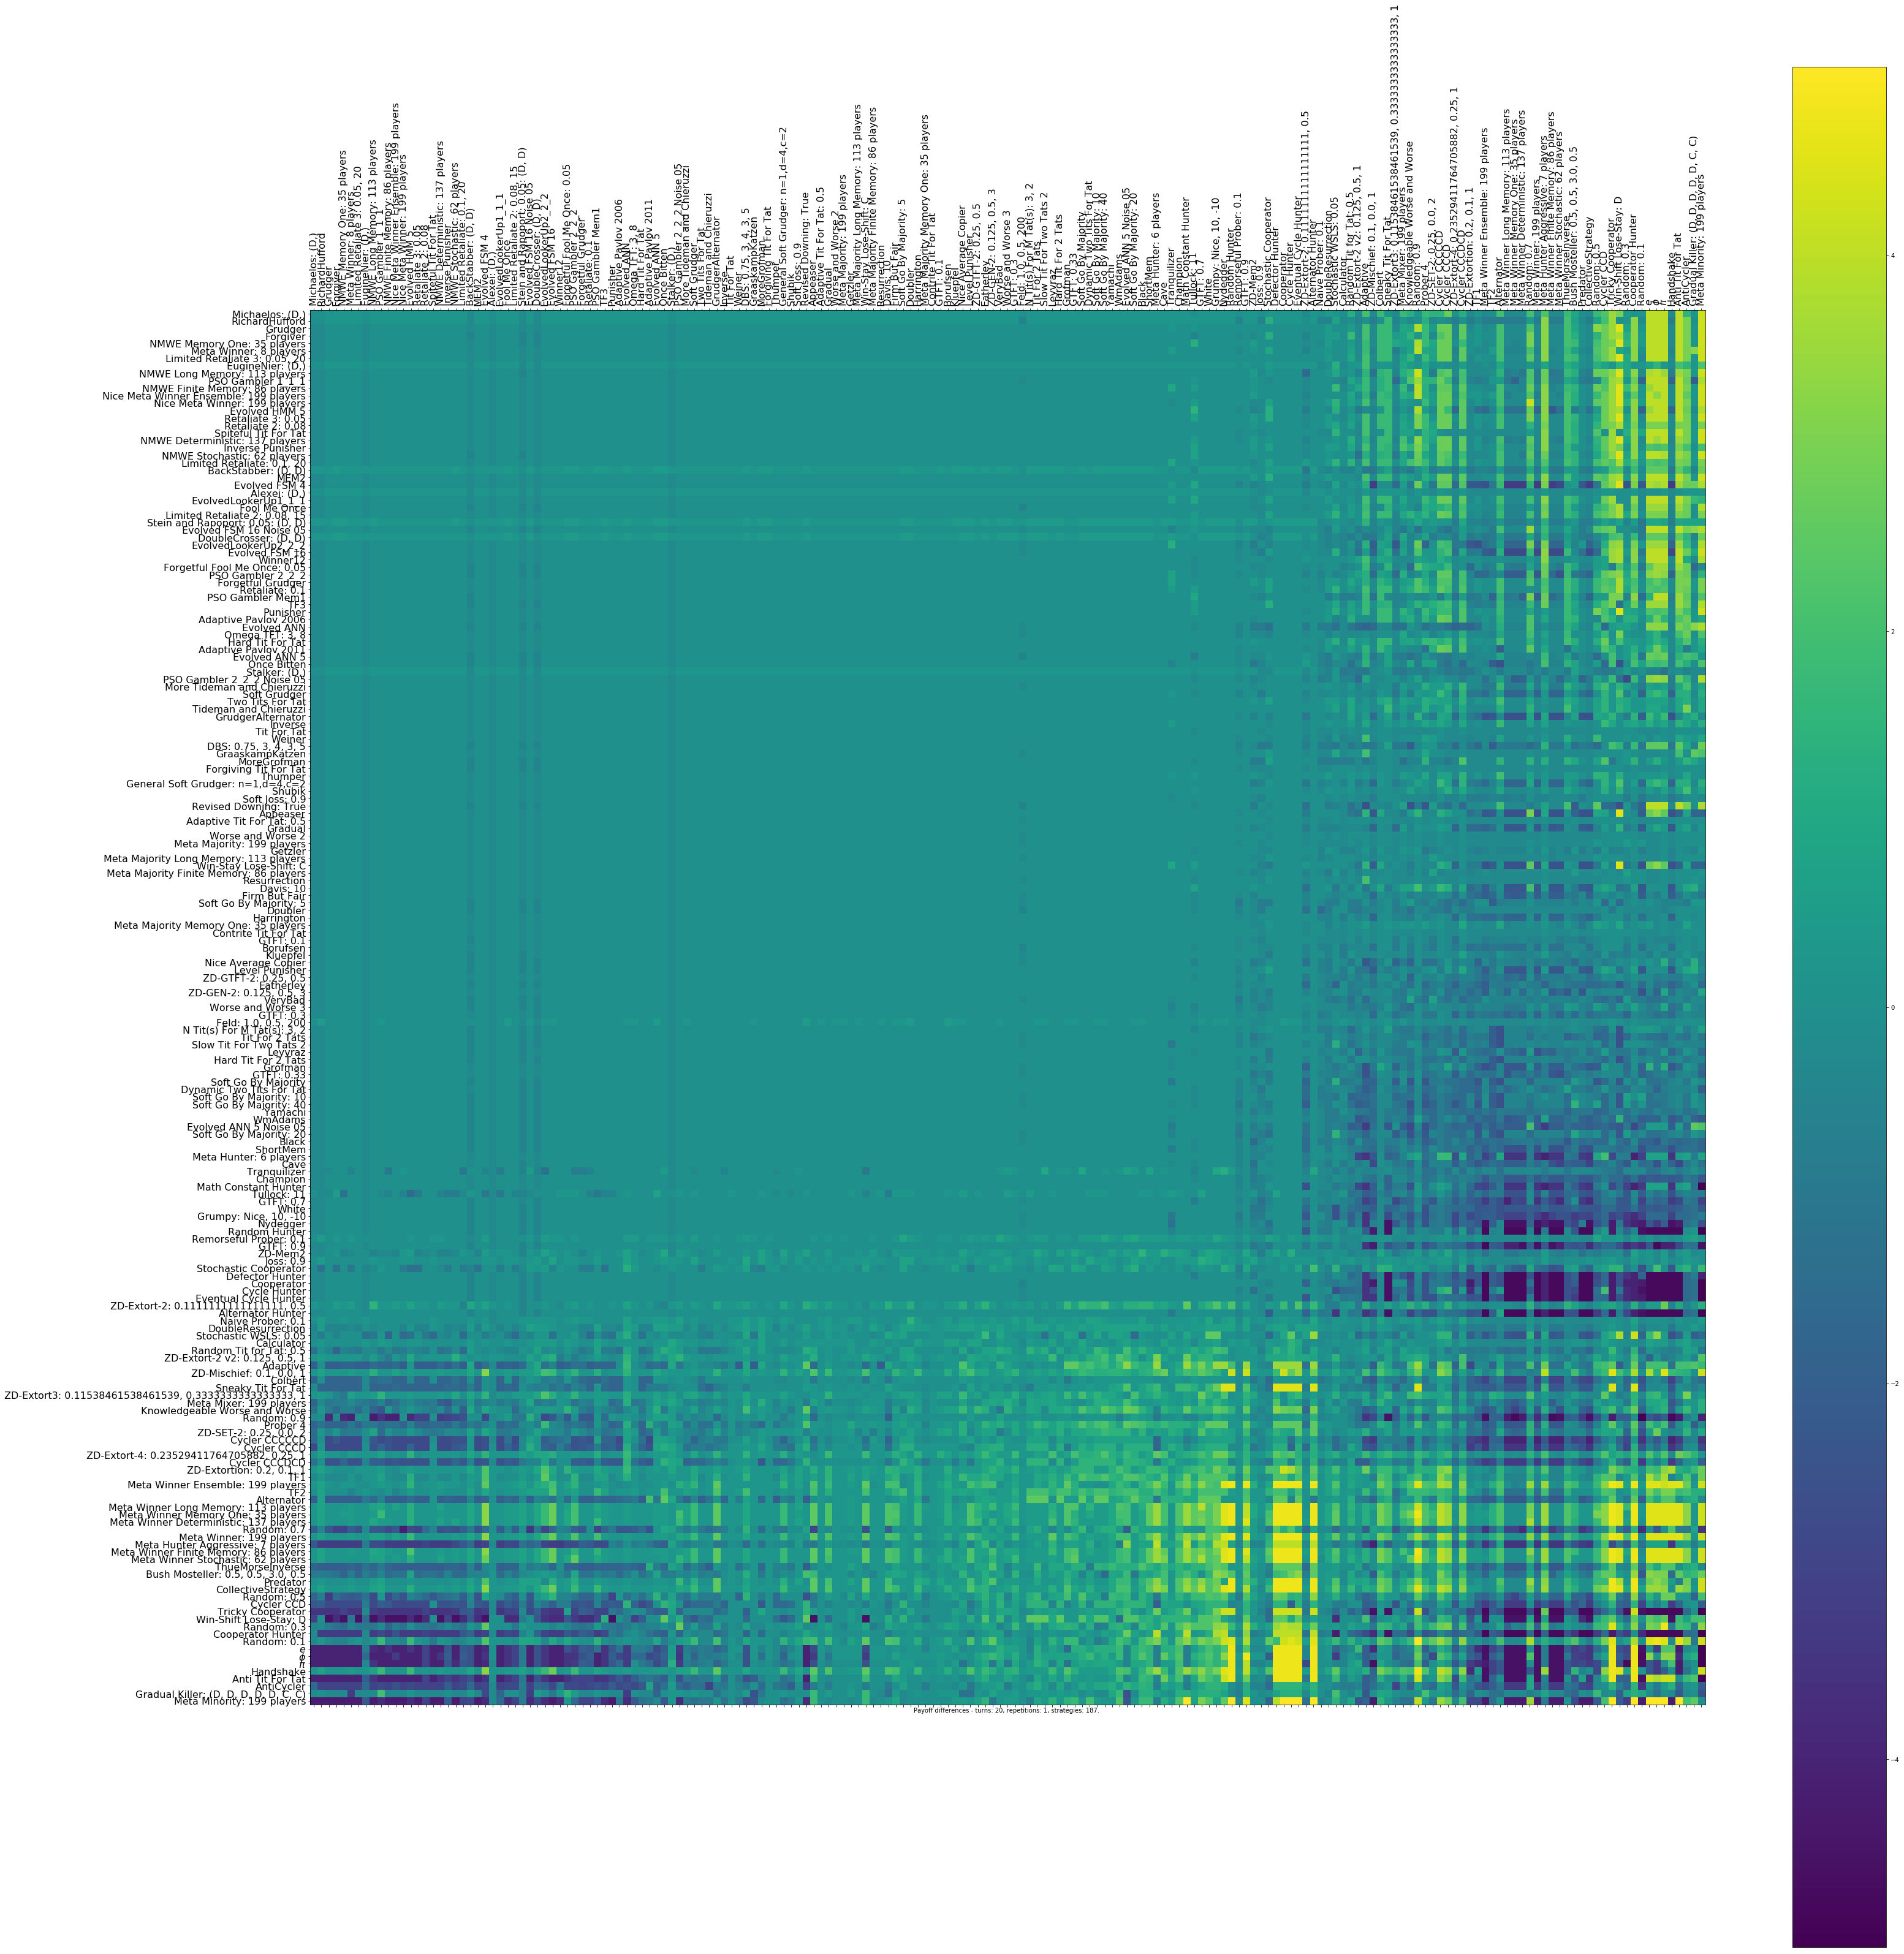

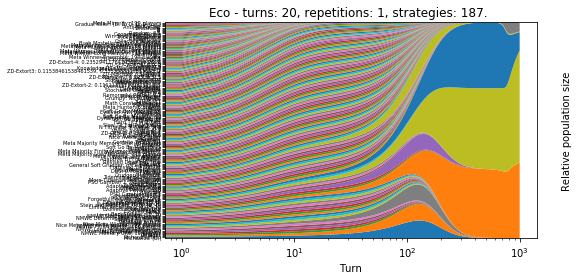

In [21]:
# run again with only good players and match_attributes={"length": float('inf')}
# this is what the paper does roughly (we don't have the EXACT same strategies but are mostly the same)
turns = 20
repetitions = 1

processes = 0
seed = 1
filename = "data/tour2_strategies_std_interactions.csv"


#tour2_results = run_tournament(good_players, turns, repetitions, filename, "tour2", "./tour2_assets", match_attributes={"length": float('inf')})

In [34]:
tour2_results_summary = pd.read_csv('tour2_assets/tour2_summary.csv', index_col='Rank')
tour2_results_summary.head()

Name  Median_score  Cooperation_rating   Wins  \
Rank                                                                         
0                 Michaelos: (D,)      2.894086            0.749194  156.0   
1                  RichardHufford      2.886290            0.794892  142.0   
2                         Grudger      2.856452            0.769624   35.0   
3                        Forgiver      2.848656            0.771505   35.0   
4     NMWE Memory One: 35 players      2.848387            0.761022   36.0   

      Initial_C_rate   CC_rate   CD_rate   DC_rate   DD_rate  CC_to_C_rate  \
Rank                                                                         
0                1.0  0.727688  0.021505  0.115054  0.135753      0.962220   
1                1.0  0.751075  0.043817  0.106989  0.098118      0.956260   
2                1.0  0.752419  0.017204  0.092204  0.138172      1.000000   
3                1.0  0.750806  0.020699  0.091935  0.136559      1.000000   
4                1.0  0.742204  0.018817  0.095699  0.143280      0.996429   

      CD_to_C_rate  DC_to_C_rate  DD_to_C_rate  
Rank                                            
0         0.000000      0.490990      0.000000  
1         0.309954      0.853968      0.090891  
2         0.000000      0.000000      0.000000  
3         0.750000      0.290625      0.000000  
4         0.750000      0.142857      0.328977